## processing text data Description

In [106]:
import pandas as pd
import os

project_folder="C:/Users/hanson/OneDrive/Grad/Grad Project/data_realtorCA/"
output_folder=project_folder+"output"

df=pd.read_csv(output_folder+"/"+"all_after_preprocessing6.csv")

In [107]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", 100)

In [108]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hanson\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [109]:
pd.set_option("display.max_rows", 50)


In [110]:
# Import packages and modules
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [111]:
df["description"][10233]

"Beautiful Spacious Semi-Detached Home In Great Etobicoke Family Neighbourhood. Fabulous Location, Steps To Junior,Middle & Well-Known Michael Power High School. Open Concept Main Level With 9' Ceiling,Gourmet Kitchen With Walkout To Balcony. Hardwood Floors,Gas Fireplace,California Shutters. Master Bedroom With 4-Pc Ensuite. Enjoy A Beautiful & Cozy Backyard. Ttc At Your Door,Shopping,Centennial Park,Olympium Pool,Easy Access To Hwy's 401,427,Q.E.W.**** EXTRAS **** Fridge,Stove,Washer,Dryer,D/Washer,Window Coverings,California Blinds,All Elf's,Garage W/Gar Door Opener+Remote,A/C,Furnace,Central Vacuum,Kick-Plate (Kitchen) * Hwt (R) * =>> Fast Closing Day Is Available! <<= * (28382320)"

## convert to lower case

In [112]:
df["description"]=df["description"].str.lower()

## check the 8 digit at the end of each description

In [113]:
df["misterious_number"]=df["description"].str.extract(r"(\d\d\d\d\d\d\d\d)")


In [114]:
len(df.misterious_number.unique())

10024

In [115]:
len(df)

10251

In [116]:
pd.set_option("display.max_rows", None)

## based on the manual inspection, the misterious number cannot indicate if the builidings are the same, or the realtor is the same, or even the realtor company is the same.

## Therefore, remove the 8 digits at the end.

In [117]:

df["description"]=df["description"].str.replace("\(\d\d\d\d\d\d\d\d\)", "")


<ipython-input-117-74c4423c9062>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace("\(\d\d\d\d\d\d\d\d\)", "")


## Fix some abbreviations

In [118]:
# replace Apostrophe ' with no string
df["description"]=df["description"].str.replace('\'', "")

In [119]:
df["description"]=df["description"].str.replace('.5 ', " and a half ")

<ipython-input-119-6cf50352a567>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('.5 ', " and a half ")


In [120]:
df["description"]=df["description"].str.replace(' c-vac ', " cvac ")

In [121]:
df["description"]=df["description"].str.replace(' d/w', " dishwasher ")

In [122]:
df["description"]=df["description"].str.replace(' w&d', " washer and dryer ")

In [123]:
df["description"]=df["description"].str.replace(' d/w', " dryer ")

In [124]:
df["description"]=df["description"].str.replace('w/o', " walk out ")

In [125]:
df["description"]=df["description"].str.replace(r' [wW][/\s]r[.\s]', " washroom ")

<ipython-input-125-478fd7d1af5c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(r' [wW][/\s]r[.\s]', " washroom ")


In [126]:
df["description"]=df["description"].str.replace(r' [wW]/', " with ")

<ipython-input-126-6cb374ffd542>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(r' [wW]/', " with ")


In [127]:
df["description"]=df["description"].str.replace(r' [wW]\&[dD][.\s]', " washer and dryer ")

<ipython-input-127-d5fe0ab47a9d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(r' [wW]\&[dD][.\s]', " washer and dryer ")


In [128]:
df["description"]=df["description"].str.replace(r'\ss/s\s', " ss ")

<ipython-input-128-92131bf23c67>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(r'\ss/s\s', " ss ")


In [129]:
df["description"]=df["description"].str.replace('bdrm', "bedroom")

In [130]:
df["description"]=df["description"].str.replace('bsmt', "basement")

In [131]:
df["description"]=df["description"].str.replace('+', " plus ")

<ipython-input-131-b893228cabcd>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["description"]=df["description"].str.replace('+', " plus ")


In [132]:
df["description"]=df["description"].str.replace('&', " and ")
df["description"]=df["description"].str.replace('\$', " CAD ")
df["description"]=df["description"].str.replace('don\'t', " do not ")
df["description"]=df["description"].str.replace('doesn\'t', " does not ")
df["description"]=df["description"].str.replace('can\'t', " cannot ")

df["description"]=df["description"].str.replace('\'ll ', " will ")

<ipython-input-132-361e904f532a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('\$', " CAD ")


In [133]:
import re
df['description'] = df['description'].apply(lambda x: re.sub(r'(\d+),(\d+)', r'\1\2', x))


## Tokenization to remove the special characters

In [134]:
tokeniser = RegexpTokenizer(r'\w+')
df["description"]=df["description"].apply(lambda x: tokeniser.tokenize(x))

In [135]:
df["description"][-30:20]

Series([], Name: description, dtype: object)

In [136]:
df["description"].head()

0    [beautiful, bright, and, spacious, home, in, the, heart, lake, community, right, off, hwy, 410, approx, 2450, sqft, of, living, space, 670sqft, in, basement, with, 4, bedrooms, and, 4, washroom, sep, entrance, through, garage, to, basement, with, full, bath, potential, for, great, rental, income, hardwood, pot, lights, and, california, shutters, throughout, freshly, painted, open, concept, floorplan, with, eat, in, kitchen, ss, appliances, minutes, to, trinity, commons, mall, parks, heart, lake, conservation, and, much, more, extras, ss, stove, fridge, dishwasher, washer, and, dryer, water, heater, rental, all, existing, light, and, hardwood, throughout, concrete, pad, leading, from, the, front, to, the, backyard, can, ...]
1                                                                                                     [this, is, an, assignment, sale, sunfield, communities, ridgehill, towns, lot, 12, closing, 19th, april, 2022, one, of, the, best, location, of, brampton, down

## detokenlization

In [137]:
df["description"]=df["description"].apply(lambda x: " ".join(word for word in x))

In [138]:
df.description.tail()

10246    incredible clanton park opportunity awaits step inside this charming renovated home on huge 40x1 and a half lot with large principal rooms on main with hardwood floors in living dining updated galley kitchen with stainless steel appliances bedroom and main bath second offers master suite with sparkling ensuite and with i closet and additional sizable bedroom basement features large rec room with kitchenette and nanny suite steps to parks schools shopping extras transit and more do not miss this ss fridge bosch dishwasher ge oven ge cooktop panasonic m w ge stove danby fridge all elfs all window coverings ecobee therm boiler samsung washer as is and inglis dryer exl all tvs hwt r
10247                                                                                                                                                                               available for the first time from original owner this is sun filled well maintained solid brick raised bungalow backing ont

## convert ordinal number to words, such as 1st--> first

In [139]:
from num2words import num2words
def replace_ordinal_numbers(text):
    re_results = re.findall('(\d+(st|nd|rd|th))', text)
    for enitre_result, suffix in re_results:
        num = int(enitre_result[:-2])
        text = text.replace(enitre_result, num2words(num, ordinal=True))
    return text
df["description"]=df["description"].apply(lambda x: replace_ordinal_numbers(x))

In [140]:
df["description"].tail(20)

10231    absolutely stunning new build condo in prime liberty village featuring gorgeous floor to ceiling windows with huge terrace plus a second balcony all with stunning panoramic lake skyline and cn tower views over CAD 40000 spent in builder upgrades upgraded wood floor 9 smooth ceilings upgraded kitchen cabinets and counters both bathrooms fully of upgraded vanities tile and glass showers very well designed suit with 2 large bedrooms just move right in extras ss appliances washer dryer floating island and b i tv wall mount 4k upgrade all elfs custom roll shades bedrooms include opera shades primary bedroom includes motorized opera shades den was converted by the builder into lrg with i closet
10232                                                                                                                                                                                                                                           welcome to royal york gardens come see this much love

## convert " w " or " W " to "with"

In [141]:
df["description"]=df["description"].str.replace(r' [wW] ', " with ")

<ipython-input-141-4edcb66df411>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(r' [wW] ', " with ")


## remove single characters except "a" or number first

In [142]:
df["description"]=df["description"].str.replace(r'\s[bcdefghijklmnopqrstuvwxyzBCDEFGHIJKLMNOPQRSTUVWXYZ]\s', " ")
df["description"]=df["description"].str.replace(r'\s[bcdefghijklmnopqrstuvwxyzBCDEFGHIJKLMNOPQRSTUVWXYZ]\s', " ")
df["description"]=df["description"].str.replace(r'\s[bcdefghijklmnopqrstuvwxyzBCDEFGHIJKLMNOPQRSTUVWXYZ]\s', " ")
df["description"]=df["description"].str.replace(r'\s[bcdefghijklmnopqrstuvwxyzBCDEFGHIJKLMNOPQRSTUVWXYZ]$', " ")
df["description"]=df["description"].str.replace(r'^[bcdefghijklmnopqrstuvwxyzBCDEFGHIJKLMNOPQRSTUVWXYZ]\s', " ")

<ipython-input-142-90da12ee051c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(r'\s[bcdefghijklmnopqrstuvwxyzBCDEFGHIJKLMNOPQRSTUVWXYZ]\s', " ")
<ipython-input-142-90da12ee051c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(r'\s[bcdefghijklmnopqrstuvwxyzBCDEFGHIJKLMNOPQRSTUVWXYZ]\s', " ")
<ipython-input-142-90da12ee051c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(r'\s[bcdefghijklmnopqrstuvwxyzBCDEFGHIJKLMNOPQRSTUVWXYZ]\s', " ")
<ipython-input-142-90da12ee051c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(r'\s[bcdefghijklmnopqrstuvwxyzBCDEFGHIJKLMNOPQRSTUVWXYZ]$', " ")
<ipython-input-14

## deal with abbreviation

In [143]:
df["description"]=df["description"].str.replace(' 1st ', " first ")
df["description"]=df["description"].str.replace(' 1st$', " first ")
df["description"]=df["description"].str.replace('^1st ', " first ")

df["description"]=df["description"].str.replace(' 2nd ', " second ")
df["description"]=df["description"].str.replace(' 2nd$', " second ")
df["description"]=df["description"].str.replace('^2nd ', " second ")

df["description"]=df["description"].str.replace(' 3rd ', " third ")
df["description"]=df["description"].str.replace(' 3rd$', " third ")
df["description"]=df["description"].str.replace('^3rd ', " third ")


df["description"]=df["description"].str.replace(' 4th ', " fourth ")
df["description"]=df["description"].str.replace(' 4th$', " fourth ")
df["description"]=df["description"].str.replace('^4th ', " fourth ")

df["description"]=df["description"].str.replace(' 5th ', " fifth ")
df["description"]=df["description"].str.replace(' 5th$', " fifth ")
df["description"]=df["description"].str.replace('^5th ', " fifth ")

df["description"]=df["description"].str.replace(' 6th ', " sixth ")
df["description"]=df["description"].str.replace(' 6th$', " sixth ")
df["description"]=df["description"].str.replace('^6th ', " sixth ")

df["description"]=df["description"].str.replace(' 7th ', " seventh ")
df["description"]=df["description"].str.replace(' 7th$', " seventh ")
df["description"]=df["description"].str.replace('^7th ', " seventh ")

df["description"]=df["description"].str.replace(' 8th ', " eighth ")
df["description"]=df["description"].str.replace(' 8th$', " eighth ")
df["description"]=df["description"].str.replace('^8th ', " eighth ")

df["description"]=df["description"].str.replace(' 9th ', " ninth ")
df["description"]=df["description"].str.replace(' 9th$', " ninth ")
df["description"]=df["description"].str.replace('^9th ', " ninth ")


<ipython-input-143-fad30b57cb0a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' 1st$', " first ")
<ipython-input-143-fad30b57cb0a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('^1st ', " first ")
<ipython-input-143-fad30b57cb0a>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' 2nd$', " second ")
<ipython-input-143-fad30b57cb0a>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('^2nd ', " second ")
<ipython-input-143-fad30b57cb0a>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' 3rd$', " third 

## seperate number and alphabetical characters

In [144]:
df["description"]=df["description"].str.replace('(\d+(\.\d+)?)', r' \1 ')

<ipython-input-144-52782c2d221e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('(\d+(\.\d+)?)', r' \1 ')


## sep usually means "seperate"

In [145]:
df["description"]=df["description"].str.replace(' sep ', " separate ")

## hwy means "highway"

In [146]:
df["description"]=df["description"].str.replace(' hwy ', " highway ")
df["description"]=df["description"].str.replace(' hwy$', " highway ")
df["description"]=df["description"].str.replace('^hwy ', " highway ")

<ipython-input-146-ed43bbeaf36b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' hwy$', " highway ")
<ipython-input-146-ed43bbeaf36b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('^hwy ', " highway ")


## bdr, bedrm means bedroom
## washrm means washroom
##  rm means room 

In [147]:
df["description"]=df["description"].str.replace(' bdr ', " bedroom ")
df["description"]=df["description"].str.replace(' bdr$', " bedroom ")
df["description"]=df["description"].str.replace('^bdr ', " bedroom ")

df["description"]=df["description"].str.replace('bedrm', "bedroom")
df["description"]=df["description"].str.replace('washrm', "washroom")
df["description"]=df["description"].str.replace('bathrm', "bathroom")

<ipython-input-147-476431fda97a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' bdr$', " bedroom ")
<ipython-input-147-476431fda97a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('^bdr ', " bedroom ")


In [148]:
df["description"]=df["description"].str.replace(' rm ', " room ")

## convert square feet to sqft

In [149]:
df["description"]=df["description"].str.replace(' sq ft ', " sqft ")
df["description"]=df["description"].str.replace('sqft', " sqft ")
df["description"]=df["description"].str.replace(' sqf ', " sqft ")
df["description"]=df["description"].str.replace(' sf ', " sqft ")


df["description"]=df["description"].str.replace('square ft', " sqft ")
df["description"]=df["description"].str.replace('square feet', " sqft ")
df["description"]=df["description"].str.replace('square foot', " sqft ")
df["description"]=df["description"].str.replace('sq feet', " sqft ")
df["description"]=df["description"].str.replace('sq foot', " sqft ")

df["description"]=df["description"].str.replace(' sqft ', " square feet ")


## convert abbreviation and mis-spelled word to the correct form

In [150]:
df["description"]=df["description"].str.replace('hardwd', "hardwood")

In [151]:
df["description"]=df["description"].str.replace('addtl', "additional")
df["description"]=df["description"].str.replace(' lvl ', " level ")
df["description"]=df["description"].str.replace(' lvl$', " level ")
df["description"]=df["description"].str.replace('^lvl ', " level ")

df["description"]=df["description"].str.replace(' lwr ', " lower ")
df["description"]=df["description"].str.replace('^lwr ', " lower ")
df["description"]=df["description"].str.replace(' lwr$', " lower ")

df["description"]=df["description"].str.replace(' fl ', " floor ")

df["description"]=df["description"].str.replace(' flr ', " floor ")
df["description"]=df["description"].str.replace(' flrs ', " floors ")
df["description"]=df["description"].str.replace(' flring ', " flooring ")

 


df["description"]=df["description"].str.replace(' reno ', " renovated ")

df["description"]=df["description"].str.replace(' entr ', " entrance ")
df["description"]=df["description"].str.replace(' ent ', " entrance ")

df["description"]=df["description"].str.replace(' balciony ', " balcony ")

df["description"]=df["description"].str.replace(' semidetached ', " semi detached ")



<ipython-input-151-217c76316a7a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' lvl$', " level ")
<ipython-input-151-217c76316a7a>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('^lvl ', " level ")
<ipython-input-151-217c76316a7a>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('^lwr ', " lower ")
<ipython-input-151-217c76316a7a>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' lwr$', " lower ")


In [152]:
df["description"]=df["description"].str.replace(' incl ', " include ")
df["description"]=df["description"].str.replace(' excl ', " exclude ")
df["description"]=df["description"].str.replace(' exl ', " exclude ")

df["description"]=df["description"].str.replace(' pcs ', " pieces ")
df["description"]=df["description"].str.replace(' pc ', " piece ")

df["description"]=df["description"].str.replace('dinning', "dining")

df["description"]=df["description"].str.replace(' stn ', " station ")

df["description"]=df["description"].str.replace(' dw ', " dishwasher ")

df["description"]=df["description"].str.replace(' ctr ', " center ")
df["description"]=df["description"].str.replace(' centre ', " center ")

df["description"]=df["description"].str.replace('rec room', "recreation room")

df["description"]=df["description"].str.replace(' cvac ', " central vacuum ")
df["description"]=df["description"].str.replace(' central vac ', " central vacuum ")


df["description"]=df["description"].str.replace(' st ', " street ")

df["description"]=df["description"].str.replace('bk yard', " back yard ")

df["description"]=df["description"].str.replace(' backyard ', " back yard ")
df["description"]=df["description"].str.replace(' ac ', " air conditioner ")

df["description"]=df["description"].str.replace(' da ', " the ")

df["description"]=df["description"].str.replace(' kit ', " kitchen ")

df["description"]=df["description"].str.replace(' kitch ', " kitchen ")

df["description"]=df["description"].str.replace(' u ', " you ")
df["description"]=df["description"].str.replace(' ur ', " your ")
df["description"]=df["description"].str.replace(' urself ', " yourself ")

df["description"]=df["description"].str.replace(' what 2 do ', " what to do ")

df["description"]=df["description"].str.replace(' dont ', " do not ")

df["description"]=df["description"].str.replace(' cul de sac ', " culdesac ")

df["description"]=df["description"].str.replace(' through out ', " throughout ")
df["description"]=df["description"].str.replace(' thru out ', " throughout ")

df["description"]=df["description"].str.replace(' hr ', " hour ")
df["description"]=df["description"].str.replace(' bld ', " boulevard ")
df["description"]=df["description"].str.replace(' remks ', " remarks ")

df["description"]=df["description"].str.replace(' fire place ', " fireplace ")

df["description"]=df["description"].str.replace(' ss ', " stainless steel ")

df["description"]=df["description"].str.replace(' hwt ', " hot water tank ")
df["description"]=df["description"].str.replace(' hwt$', " hot water tank ")

df["description"]=df["description"].str.replace(' hwts ', " hot water tank ")
df["description"]=df["description"].str.replace(' hwts$', " hot water tank ")

 
df["description"]=df["description"].str.replace(' incl ', " include ")
df["description"]=df["description"].str.replace(' incl$', " include ")


df["description"]=df["description"].str.replace(' incls ', " include ")


df["description"]=df["description"].str.replace(' inc ', " include ")

df["description"]=df["description"].str.replace(' excl ', " exclude ")
df["description"]=df["description"].str.replace(' exl ', " exclude ")
df["description"]=df["description"].str.replace(' excls ', " exclude ")



df["description"]=df["description"].str.replace(' pcs ', " pieces ")
df["description"]=df["description"].str.replace(' pc ', " piece ")

df["description"]=df["description"].str.replace('dinning', "dining")

df["description"]=df["description"].str.replace(' stn ', " station ")

df["description"]=df["description"].str.replace(' dw ', " dishwasher ")

df["description"]=df["description"].str.replace(' ctr ', " center ")
df["description"]=df["description"].str.replace(' centre ', " center ")

df["description"]=df["description"].str.replace('rec room', "recreation room")

df["description"]=df["description"].str.replace(' cvac ', " central vac ")


df["description"]=df["description"].str.replace(' st ', " street ")

df["description"]=df["description"].str.replace('bk yard', " back yard ")

df["description"]=df["description"].str.replace(' back yard ', " backyard ")
df["description"]=df["description"].str.replace(' ac ', " air conditioner ")

df["description"]=df["description"].str.replace(' da ', " the ")

df["description"]=df["description"].str.replace(' kit ', " kitchen ")

df["description"]=df["description"].str.replace(' kitch ', " kitchen ")

df["description"]=df["description"].str.replace(' kitn ', " kitchen ")



df["description"]=df["description"].str.replace(' u ', " you ")
df["description"]=df["description"].str.replace(' ur ', " your ")
df["description"]=df["description"].str.replace(' urself ', " yourself ")

df["description"]=df["description"].str.replace(' what 2 do ', " what to do ")

df["description"]=df["description"].str.replace(' dont ', " do not ")
df["description"]=df["description"].str.replace(' don miss', " do not miss")


df["description"]=df["description"].str.replace(' cul de sac ', " culdesac ")

df["description"]=df["description"].str.replace(' through out ', " throughout ")
df["description"]=df["description"].str.replace(' thru out ', " throughout ")
df["description"]=df["description"].str.replace(' thruout ', " throughout ")
df["description"]=df["description"].str.replace(' thr out ', " throughout ")


df["description"]=df["description"].str.replace(' thru ', " through ")


 
df["description"]=df["description"].str.replace(' hr ', " hour ")
df["description"]=df["description"].str.replace(' hrs ', " hours ")


df["description"]=df["description"].str.replace(' bld ', " boulevard ")
df["description"]=df["description"].str.replace(' remks ', " remarks ")

df["description"]=df["description"].str.replace(' fire place ', " fireplace ")

df["description"]=df["description"].str.replace(' ss ', " stainless steel ")

df["description"]=df["description"].str.replace(' tvs ', " television ")
df["description"]=df["description"].str.replace(' tv ', " television ")


df["description"]=df["description"].str.replace(' br ', " bedroom ")
df["description"]=df["description"].str.replace(' br$', " bedroom ")

df["description"]=df["description"].str.replace(' brm ', " bedroom ")
df["description"]=df["description"].str.replace(' brs ', " bedrooms ")

df["description"]=df["description"].str.replace(' pre emptive ', " preemptive ")
df["description"]=df["description"].str.replace(' pre ', " previously ")


df["description"]=df["description"].str.replace(' eng hardwood ', " engineered hardwood ")
df["description"]=df["description"].str.replace(' bksplsh ', " backsplash ")

df["description"]=df["description"].str.replace(' bathflrs ', " bath floors ")

df["description"]=df["description"].str.replace(' grnd ', " ground ")

df["description"]=df["description"].str.replace(' fl washer ', " front load ")

df["description"]=df["description"].str.replace(' gdo ', " garage door opener ")
df["description"]=df["description"].str.replace(' gdo$', " garage door opener ")

df["description"]=df["description"].str.replace(' cac ', " central air conditioner ")

df["description"]=df["description"].str.replace(' quite street ', " quiet street ")

df["description"]=df["description"].str.replace(' dist ', " distance ")

df["description"]=df["description"].str.replace(' abv ', " above ")

df["description"]=df["description"].str.replace(' bkfst ', " breakfast ")

df["description"]=df["description"].str.replace(' lrg ', " large ")

df["description"]=df["description"].str.replace(' hdwd ', " hardwood ")
df["description"]=df["description"].str.replace(' hrdwd ', " hardwood ")


df["description"]=df["description"].str.replace(' cntp ', " countertop ")

df["description"]=df["description"].str.replace(' rntl ', " rental ")
df["description"]=df["description"].str.replace(' rntl$', " rental ")


df["description"]=df["description"].str.replace(' bbq ', " barbeque ")
df["description"]=df["description"].str.replace(' bbq$', " barbeque ")

df["description"]=df["description"].str.replace(' pls ', " please ")
df["description"]=df["description"].str.replace(' pls$', " please ")

df["description"]=df["description"].str.replace(' apt$', " apartment ")
df["description"]=df["description"].str.replace(' apt ', " apartment ")
df["description"]=df["description"].str.replace('^apt ', " apartment ")

df["description"]=df["description"].str.replace(' lr ', " living room ")
df["description"]=df["description"].str.replace(' dr ', " dining room ")

df["description"]=df["description"].str.replace(' fp ', " fireplace ")

df["description"]=df["description"].str.replace(' dble ', " double ")
df["description"]=df["description"].str.replace(' dbl ', " double ")



df["description"]=df["description"].str.replace(' gar ', " garage ")

df["description"]=df["description"].str.replace(' approx ', " approximately ")
df["description"]=df["description"].str.replace(' appr ', " approximately ")
df["description"]=df["description"].str.replace('^appr ', " approximately ")


df["description"]=df["description"].str.replace(' fab ', " fabulous ")
df["description"]=df["description"].str.replace('^fab ', " fabulous ")
df["description"]=df["description"].str.replace(' fab$', " fabulous ")


df["description"]=df["description"].str.replace(' bed ', " bedroom ")

df["description"]=df["description"].str.replace(' bath ', " bathroom ")

df["description"]=df["description"].str.replace(' potlights ', " pot lights ")

df["description"]=df["description"].str.replace(' ave ', " avenue ")

df["description"]=df["description"].str.replace(' atn ', " attention ")

df["description"]=df["description"].str.replace(' attn ', " attention ")



df["description"]=df["description"].str.replace(' cre ', " crescent ")

df["description"]=df["description"].str.replace(' cres ', " crescent ")

df["description"]=df["description"].str.replace(' prem ', " premium ")

df["description"]=df["description"].str.replace(' cntr ', " center ")

df["description"]=df["description"].str.replace(' dvp ', " don valley parkway ")

df["description"]=df["description"].str.replace(' lgl ', " legal ")

df["description"]=df["description"].str.replace(' desc ', " description ")

df["description"]=df["description"].str.replace(' twp ', " township ")

#df["description"]=df["description"].str.replace(' ttc ', " toronto transit commission ")

df["description"]=df["description"].str.replace(' maint ', " maintenance ")

df["description"]=df["description"].str.replace(' incd ', " included ")
df["description"]=df["description"].str.replace(' incd$', " included ")
df["description"]=df["description"].str.replace(' incld ', " include ")



df["description"]=df["description"].str.replace(' avbl ', " available ")
df["description"]=df["description"].str.replace(' avbl$', " available ")


df["description"]=df["description"].str.replace(' ft ', " feet ")
df["description"]=df["description"].str.replace(' ft$', " feet ")
df["description"]=df["description"].str.replace('^ft ', " feet ")

df["description"]=df["description"].str.replace(' equiment ', " equipment ")
df["description"]=df["description"].str.replace('^equiment ', " equipment ")
df["description"]=df["description"].str.replace(' equiment$', " equipment ")

df["description"]=df["description"].str.replace(' min ', " minute ")
df["description"]=df["description"].str.replace(' mins ', " minute ")

df["description"]=df["description"].str.replace(' uft ', " university of toronto ")
df["description"]=df["description"].str.replace(' uoft ', " university of toronto ")

df["description"]=df["description"].str.replace(' hm ', " home ")

df["description"]=df["description"].str.replace(' mnth ', " month ")

df["description"]=df["description"].str.replace(' apprx ', " approximately ")

df["description"]=df["description"].str.replace(' sq ', " square ")
df["description"]=df["description"].str.replace('^sq ', " square ")
df["description"]=df["description"].str.replace(' sq$', " square ")

df["description"]=df["description"].str.replace(' appx ', " approximate ")

df["description"]=df["description"].str.replace(' you re ', " you are ")

df["description"]=df["description"].str.replace(' ciity  ', " city ")

df["description"]=df["description"].str.replace(' xcellent ', " excellent ")
df["description"]=df["description"].str.replace('^xcellent ', " excellent ")
df["description"]=df["description"].str.replace(' xcellent$', " excellent ")

df["description"]=df["description"].str.replace(' mt pleasant ', " mount pleasant ")
df["description"]=df["description"].str.replace('^mt pleasant ', " mount pleasant ")
df["description"]=df["description"].str.replace(' mt pleasant$', " mount pleasant ")

df["description"]=df["description"].str.replace(' liv ', " living ")

df["description"]=df["description"].str.replace(' din ', " dining ")
 
df["description"]=df["description"].str.replace(' ameneties ', " amenities ")

df["description"]=df["description"].str.replace(' frt ', " front ")

df["description"]=df["description"].str.replace(' centres ', " center ")

df["description"]=df["description"].str.replace(' rec ', " recreation ")

df["description"]=df["description"].str.replace(' crt ', " crescent ")

df["description"]=df["description"].str.replace(' lg ', " large ")

df["description"]=df["description"].str.replace(' walkin ', " walking ")

df["description"]=df["description"].str.replace(' fin ', " finished ")

df["description"]=df["description"].str.replace(' wdws ', " windows ")

df["description"]=df["description"].str.replace(' wd ', " wood ")

df["description"]=df["description"].str.replace(' egdo ', " electric garage door ")

df["description"]=df["description"].str.replace(' hwys ', " highway ")
df["description"]=df["description"].str.replace(' hwys$', " highway ")

df["description"]=df["description"].str.replace(' fam ', " family ")

df["description"]=df["description"].str.replace(' comm ', " community ")

df["description"]=df["description"].str.replace(' prefect ', " perfect ")

df["description"]=df["description"].str.replace(' washer dyer ', " washer dryer ")
df["description"]=df["description"].str.replace(' washer and dyer ', " washer and dryer ")

df["description"]=df["description"].str.replace(' det house ', " detached house ")

df["description"]=df["description"].str.replace(' roughin ', " rough in ")

df["description"]=df["description"].str.replace(' walkout ', " walk out ")


df["description"]=df["description"].str.replace(' mldg ', " molding ")
df["description"]=df["description"].str.replace(' mldgs ', " molding ")

df["description"]=df["description"].str.replace(' prof ', " professional ")

df["description"]=df["description"].str.replace(' carbon mon ', " carbon monoxide ")

df["description"]=df["description"].str.replace(' chdlr ', " chandelier ")

df["description"]=df["description"].str.replace(' condationer ', " conditioner ")

df["description"]=df["description"].str.replace(' ext ', " extras ")

df["description"]=df["description"].str.replace(' en suite ', " ensuite ")

df["description"]=df["description"].str.replace(' air condition ', " air conditioner ")

df["description"]=df["description"].str.replace(' air conditioning ', " air conditioner ")

df["description"]=df["description"].str.replace(' refrigerator ', " fridge ")

df["description"]=df["description"].str.replace(' tlc ', " tender loving care ")

df["description"]=df["description"].str.replace(' nw facing ', " northwest facing ")
df["description"]=df["description"].str.replace(' nw ', " northwest ")
df["description"]=df["description"].str.replace(' sw ', " southwest ")

 
df["description"]=df["description"].str.replace(' ffice ', " office ")

df["description"]=df["description"].str.replace(' ens bathroom ', " ensuite bathroom ")

df["description"]=df["description"].str.replace(' prkg ', " parking ")
df["description"]=df["description"].str.replace(' prkg$', " parking ")

df["description"]=df["description"].str.replace(' pking ', " parking ")
df["description"]=df["description"].str.replace(' pking$', " parking ")



df["description"]=df["description"].str.replace(' hdwr ', " hardware ")

df["description"]=df["description"].str.replace(' est ', " estimated ")

df["description"]=df["description"].str.replace(' estm ', " estimated ")


df["description"]=df["description"].str.replace(' mn ', " main ")

df["description"]=df["description"].str.replace(' linc ', " lincoln alexander parkway ")

df["description"]=df["description"].str.replace(' won be ', " will not ")

df["description"]=df["description"].str.replace(' blt in ', " built in ")

df["description"]=df["description"].str.replace(' porcelin ', " porcelain ")

df["description"]=df["description"].str.replace(' oc transpo ', " octranspo ")
df["description"]=df["description"].str.replace(' oc transpo$', " octranspo ")


df["description"]=df["description"].str.replace(' yr ', " year ")
df["description"]=df["description"].str.replace('^yr ', " year ")
df["description"]=df["description"].str.replace(' yr$', " year ")

df["description"]=df["description"].str.replace(' yrs ', " years ")
df["description"]=df["description"].str.replace('^yrs ', " years ")
df["description"]=df["description"].str.replace(' yrs$', " years ")

df["description"]=df["description"].str.replace(' detach home ', " detached home ")

df["description"]=df["description"].str.replace(' mstr ', " master ")

df["description"]=df["description"].str.replace(' mbr ', " master bedroom ")
df["description"]=df["description"].str.replace(' mbr$', " master bedroom ")

 

df["description"]=df["description"].str.replace(' utm ', " university of toronto mississauga ")

df["description"]=df["description"].str.replace(' theater ', " theatre ")

df["description"]=df["description"].str.replace(' nannysuite ', " nanny suite ")

df["description"]=df["description"].str.replace(' neighborhood ', " neighbourhood ")

df["description"]=df["description"].str.replace(' specious ', " spacious ")

df["description"]=df["description"].str.replace(' roof top ', " rooftop ")

df["description"]=df["description"].str.replace(' insur ', " insurance ")

df["description"]=df["description"].str.replace(' buildin ', " building ")
df["description"]=df["description"].str.replace('^buildin ', " building ")
df["description"]=df["description"].str.replace(' buildin$', " building ")


df["description"]=df["description"].str.replace(' bldg ', " building ")
df["description"]=df["description"].str.replace('^bldg ', " building ")
df["description"]=df["description"].str.replace(' bldg$', " building ")


df["description"]=df["description"].str.replace(' bsmnt ', " basement ")

df["description"]=df["description"].str.replace(' coin op ', " coin operated ")

df["description"]=df["description"].str.replace(' turn key ', " turnkey ")

df["description"]=df["description"].str.replace(' qew ', " queen elizabeth way ")
df["description"]=df["description"].str.replace('^qew ', " queen elizabeth way ")
df["description"]=df["description"].str.replace(' qew$', " queen elizabeth way ")


df["description"]=df["description"].str.replace(' larage ', " large ")

df["description"]=df["description"].str.replace(' lge ', " large ")
df["description"]=df["description"].str.replace('^lge ', " large ")
df["description"]=df["description"].str.replace(' lge$', " large ")



df["description"]=df["description"].str.replace(' rangehood', " range hood ")

df["description"]=df["description"].str.replace('breath taking', "breathtaking")

df["description"]=df["description"].str.replace('gardnier', "gardiner")

df["description"]=df["description"].str.replace('over the range microwave', "otr microwave")

df["description"]=df["description"].str.replace('over range microwave', "otr microwave")

df["description"]=df["description"].str.replace(' equiped ', " equipped ")

df["description"]=df["description"].str.replace('water front', "waterfront")

df["description"]=df["description"].str.replace(' pen concept ', " open concept ")

df["description"]=df["description"].str.replace(' re modeled ', " remodeled ")

df["description"]=df["description"].str.replace(' hottub ', " hot hub ")

df["description"]=df["description"].str.replace(' carwash ', " car wash ")
df["description"]=df["description"].str.replace(' carwash$', " car wash ")

df["description"]=df["description"].str.replace(' back splash ', " backsplash ")
df["description"]=df["description"].str.replace('^back splash ', " backsplash ")
df["description"]=df["description"].str.replace(' back splash$', " backsplash ")

df["description"]=df["description"].str.replace(' pce ', " piece ")
df["description"]=df["description"].str.replace(' pice ', " piece ")

 
df["description"]=df["description"].str.replace(' appl ', " appliance ")
df["description"]=df["description"].str.replace(' app ', " appliance ")
df["description"]=df["description"].str.replace(' appls ', " appliances ")


df["description"]=df["description"].str.replace(' wsher ', " washer ")

df["description"]=df["description"].str.replace(' attachd ', " attached ")
df["description"]=df["description"].str.replace(' attachd$', " attached ")
df["description"]=df["description"].str.replace('^attachd ', " attached ")

df["description"]=df["description"].str.replace(' soughtafter ', " sought after ")

df["description"]=df["description"].str.replace(' bthrms ', " bathrooms ")
df["description"]=df["description"].str.replace(' bthrms$', " bathrooms ")
df["description"]=df["description"].str.replace('^bthrms ', " bathrooms ")

df["description"]=df["description"].str.replace(' bthrm ', " bathroom ")
df["description"]=df["description"].str.replace(' bthrm$', " bathroom ")
df["description"]=df["description"].str.replace('^bthrm ', " bathroom ")

df["description"]=df["description"].str.replace(' you ve ', " you have ")
df["description"]=df["description"].str.replace('^you ve ', " you have ")

df["description"]=df["description"].str.replace(' strge ', " storage ")
df["description"]=df["description"].str.replace(' strge$', " storage ")
df["description"]=df["description"].str.replace('^strge ', " storage ")

df["description"]=df["description"].str.replace(' lyr ', " layer ")
df["description"]=df["description"].str.replace(' lyr$', " layer ")
df["description"]=df["description"].str.replace('^lyr ', " layer ")

df["description"]=df["description"].str.replace(' dish washer', " dishwasher ")

df["description"]=df["description"].str.replace(' wr ', " washroom ")
df["description"]=df["description"].str.replace(' wr$', " washroom ")

df["description"]=df["description"].str.replace(' quite crescent ', " quiet crescent ")
df["description"]=df["description"].str.replace('^quite crescent ', " quiet crescent ")
df["description"]=df["description"].str.replace(' quite crescent$', " quiet crescent ")


df["description"]=df["description"].str.replace(' side walk ', " sidewalk ")
df["description"]=df["description"].str.replace('^side walk ', " sidewalk ")
df["description"]=df["description"].str.replace(' side walk$', " sidewalk ")

df["description"]=df["description"].str.replace(' mordern ', " modern ")
df["description"]=df["description"].str.replace(' mordern$', " modern ")
df["description"]=df["description"].str.replace('^mordern ', " modern ")

df["description"]=df["description"].str.replace(' neighbors ', " neighbours ")
df["description"]=df["description"].str.replace('^neighbors ', " neighbours ")
df["description"]=df["description"].str.replace(' neighbors$', " neighbours ")

df["description"]=df["description"].str.replace(' neighbor ', " neighbour ")
df["description"]=df["description"].str.replace('^neighbor ', " neighbour ")
df["description"]=df["description"].str.replace(' neighbor$', " neighbour ")

df["description"]=df["description"].str.replace(' floorplan ', " floor plan ")

df["description"]=df["description"].str.replace(' re development ', " redevelopment ")

df["description"]=df["description"].str.replace(' ev ', " electric vehicle ")

df["description"]=df["description"].str.replace(' super market ', " supermarket ")
df["description"]=df["description"].str.replace(' super market$', " supermarket ")
df["description"]=df["description"].str.replace('^super market ', " supermarket ")

df["description"]=df["description"].str.replace(' etobicoke ci ', " etobicoke collegiate institute ")

df["description"]=df["description"].str.replace(' insp ', " inspection ")
df["description"]=df["description"].str.replace('^insp ', " inspection ")
df["description"]=df["description"].str.replace(' insp$', " inspection ")

df["description"]=df["description"].str.replace(' exec ', " executive ")
df["description"]=df["description"].str.replace('^exec ', " executive ")
df["description"]=df["description"].str.replace(' exec$', " executive ")

df["description"]=df["description"].str.replace(' rms ', " rooms ")
df["description"]=df["description"].str.replace('^rms ', " rooms ")
df["description"]=df["description"].str.replace(' rms$', " rooms ")


df["description"]=df["description"].str.replace(' hw ', " hardwood floor ")
df["description"]=df["description"].str.replace('^hw ', " hardwood floor ")
df["description"]=df["description"].str.replace(' hw$', " hardwood floor ")

df["description"]=df["description"].str.replace(' hwf ', " hardwood floor ")
df["description"]=df["description"].str.replace('^hwf ', " hardwood floor ")
df["description"]=df["description"].str.replace(' hwf$', " hardwood floor ")

 

df["description"]=df["description"].str.replace(' gb ', " gas burner ")
df["description"]=df["description"].str.replace('^gb ', " gas burner ")
df["description"]=df["description"].str.replace(' gb$', " gas burner ")

df["description"]=df["description"].str.replace(' lph ', " lower penthouse ")
df["description"]=df["description"].str.replace('^lph ', " lower penthouse ")
df["description"]=df["description"].str.replace(' lph$', " lower penthouse ")

df["description"]=df["description"].str.replace(' locaction ', " locaction ")
df["description"]=df["description"].str.replace('^locaction ', " locaction ")
df["description"]=df["description"].str.replace(' locaction$', " locaction ")

df["description"]=df["description"].str.replace(' mic ', " microwave ")
df["description"]=df["description"].str.replace(' mic$', " microwave ")

df["description"]=df["description"].str.replace(' micro ', " microwave ")
df["description"]=df["description"].str.replace(' micro$', " microwave ")



df["description"]=df["description"].str.replace(' lckr ', " locker ")
df["description"]=df["description"].str.replace(' lckr$', " locker ")
df["description"]=df["description"].str.replace('^lckr ', " locker ")

df["description"]=df["description"].str.replace(' counter tops ', " countertops ")
df["description"]=df["description"].str.replace(' counter tops$', " countertops ")
df["description"]=df["description"].str.replace('^counter tops ', " countertops ")

df["description"]=df["description"].str.replace(' counter top ', " countertop ")
df["description"]=df["description"].str.replace(' counter top$', " countertop ")
df["description"]=df["description"].str.replace('^counter top ', " countertop ")

df["description"]=df["description"].str.replace(' nac ', " national art center ")
df["description"]=df["description"].str.replace(' nac$', " national art center ")
df["description"]=df["description"].str.replace('^nac ', " national art center ")


df["description"]=df["description"].str.replace(' south west ', " southwest ")

df["description"]=df["description"].str.replace(' over sized ', " oversized ")

df["description"]=df["description"].str.replace(' exisiting ', " existing ")

df["description"]=df["description"].str.replace(' orig ', " original ")

df["description"]=df["description"].str.replace(' spc ', " space ")
df["description"]=df["description"].str.replace(' spc$', " space ")

df["description"]=df["description"].str.replace(' fr ', " family room ")
df["description"]=df["description"].str.replace(' fr$', " family room ")

df["description"]=df["description"].str.replace(' stv ', " stove ")
df["description"]=df["description"].str.replace(' stv$', " stove ")

df["description"]=df["description"].str.replace(' wndw ', " window ")
df["description"]=df["description"].str.replace('^wndw ', " window ")
df["description"]=df["description"].str.replace(' wndw$', " window ")

df["description"]=df["description"].str.replace(' crt ', " court ")
df["description"]=df["description"].str.replace('^crt ', " court ")
df["description"]=df["description"].str.replace(' crt$', " court ")

df["description"]=df["description"].str.replace(' crts ', " courts ")
df["description"]=df["description"].str.replace('^crts ', " courts ")
df["description"]=df["description"].str.replace(' crts$', " courts ")

df["description"]=df["description"].str.replace(' hobbyistes ', " hobbyistes ")
df["description"]=df["description"].str.replace('^hobbyistes ', " hobbyistes ")
df["description"]=df["description"].str.replace(' hobbyistes$', " hobbyistes ")

df["description"]=df["description"].str.replace(' smarthome ', " smart home ")
df["description"]=df["description"].str.replace('^smarthome ', " smart home ")
df["description"]=df["description"].str.replace(' smarthome$', " smart home ")

df["description"]=df["description"].str.replace(' cook top ', " cooktop ")
df["description"]=df["description"].str.replace(' cook top$', " cooktop ")

df["description"]=df["description"].str.replace(' bath ', " bathroom ")
df["description"]=df["description"].str.replace('^bath ', " bathroom ")
df["description"]=df["description"].str.replace(' bath$', " bathroom ")

df["description"]=df["description"].str.replace(' baths ', " bathrooms ")
df["description"]=df["description"].str.replace('^baths ', " bathrooms ")
df["description"]=df["description"].str.replace(' baths$', " bathrooms ")

df["description"]=df["description"].str.replace(' wfh ', " work from home ")
df["description"]=df["description"].str.replace('^wfh ', " work from home ")
df["description"]=df["description"].str.replace(' wfh$', " work from home ")

df["description"]=df["description"].str.replace(' bckyrd ', " backyard ")
df["description"]=df["description"].str.replace('^bckyrd ', " backyard ")
df["description"]=df["description"].str.replace(' bckyrd$', " backyard ")

df["description"]=df["description"].str.replace(' busses ', " buses ")
df["description"]=df["description"].str.replace('^busses ', " buses ")
df["description"]=df["description"].str.replace(' busses$', " buses ")

df["description"]=df["description"].str.replace(' two story ', " two storey ")
df["description"]=df["description"].str.replace('^two story ', " two storey ")
df["description"]=df["description"].str.replace(' two story$', " two storey ")

df["description"]=df["description"].str.replace(' nyc ', " new york city ")
df["description"]=df["description"].str.replace('^nyc ', " new york city ")
df["description"]=df["description"].str.replace(' nyc$', " new york city ")

df["description"]=df["description"].str.replace(' xtra ', " extra ")
df["description"]=df["description"].str.replace('^xtra ', " extra ")
df["description"]=df["description"].str.replace(' xtra$', " extra ")

df["description"]=df["description"].str.replace(' opprtnty ', " opportunity ")
df["description"]=df["description"].str.replace('^opprtnty ', " opportunity ")
df["description"]=df["description"].str.replace(' opprtnty$', " opportunity ")

df["description"]=df["description"].str.replace(' nghbrhd ', " neighbourhood ")
df["description"]=df["description"].str.replace('^nghbrhd ', " neighbourhood ")
df["description"]=df["description"].str.replace(' nghbrhd$', " neighbourhood ")

df["description"]=df["description"].str.replace(' cncpt ', " concept ")
df["description"]=df["description"].str.replace('^cncpt ', " concept ")
df["description"]=df["description"].str.replace(' cncpt$', " concept ")

df["description"]=df["description"].str.replace(' expsr ', " exposure ")
df["description"]=df["description"].str.replace('^expsr ', " exposure ")
df["description"]=df["description"].str.replace(' expsr$', " exposure ")

df["description"]=df["description"].str.replace(' wdw ', " window ")
df["description"]=df["description"].str.replace('^wdw ', " window ")
df["description"]=df["description"].str.replace(' wdw$', " window ")

df["description"]=df["description"].str.replace(' entrce ', " entrance ")
df["description"]=df["description"].str.replace('^entrce ', " entrance ")
df["description"]=df["description"].str.replace(' entrce$', " entrance ")

df["description"]=df["description"].str.replace(' xl ', " extra large ")
df["description"]=df["description"].str.replace('^xl ', " extra large ")
df["description"]=df["description"].str.replace(' xl$', " extra large ")

df["description"]=df["description"].str.replace(' equip ', " equipment ")
df["description"]=df["description"].str.replace('^equip ', " equipment ")
df["description"]=df["description"].str.replace(' equip$', " equipment ")

df["description"]=df["description"].str.replace(' blk ', " black ")
df["description"]=df["description"].str.replace('^blk ', " black ")
df["description"]=df["description"].str.replace(' blk$', " black ")

df["description"]=df["description"].str.replace(' sytem ', " system ")
df["description"]=df["description"].str.replace('^sytem ', " system ")
df["description"]=df["description"].str.replace(' sytem$', " system ")

df["description"]=df["description"].str.replace(' hook up ', " hookup ")
df["description"]=df["description"].str.replace('^hook up ', " hookup ")
df["description"]=df["description"].str.replace(' hook up$', " hookup ")

df["description"]=df["description"].str.replace(' elf ', " electric lights fixtures ")
df["description"]=df["description"].str.replace('^elf ', " electric lights fixtures ")
df["description"]=df["description"].str.replace(' elf$', " electric lights fixtures ")

<ipython-input-152-e5d594caf118>:58: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' hwt$', " hot water tank ")
<ipython-input-152-e5d594caf118>:61: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' hwts$', " hot water tank ")
<ipython-input-152-e5d594caf118>:65: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' incl$', " include ")
<ipython-input-152-e5d594caf118>:151: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' br$', " bedroom ")
<ipython-input-152-e5d594caf118>:170: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].st

<ipython-input-152-e5d594caf118>:470: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' lge$', " large ")
<ipython-input-152-e5d594caf118>:495: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' carwash$', " car wash ")
<ipython-input-152-e5d594caf118>:498: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('^back splash ', " backsplash ")
<ipython-input-152-e5d594caf118>:499: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' back splash$', " backsplash ")
<ipython-input-152-e5d594caf118>:513: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["des

<ipython-input-152-e5d594caf118>:608: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' locaction$', " locaction ")
<ipython-input-152-e5d594caf118>:611: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' mic$', " microwave ")
<ipython-input-152-e5d594caf118>:614: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' micro$', " microwave ")
<ipython-input-152-e5d594caf118>:619: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' lckr$', " locker ")
<ipython-input-152-e5d594caf118>:620: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].

<ipython-input-152-e5d594caf118>:717: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' cncpt$', " concept ")
<ipython-input-152-e5d594caf118>:720: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('^expsr ', " exposure ")
<ipython-input-152-e5d594caf118>:721: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(' expsr$', " exposure ")
<ipython-input-152-e5d594caf118>:724: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('^wdw ', " window ")
<ipython-input-152-e5d594caf118>:725: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.rep

## Remove the phone number

In [153]:
df["description"]=df["description"].str.replace(r'\d\d\d\s?\d\d\d\s?\d\d\d\d', " ")


<ipython-input-153-b2d7a543e955>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(r'\d\d\d\s?\d\d\d\s?\d\d\d\d', " ")



## convert " k " to " thousand "

In [154]:
df["description"]=df["description"].str.replace(' k ', " thousand ")

## remove more than 1 spaces

In [155]:
df["description"]=df["description"].str.replace("\s\s+", " ")


<ipython-input-155-8850c5e32a59>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace("\s\s+", " ")


## remove single character except "a" or number again

In [156]:
df["description"]=df["description"].str.replace(r'\s[bcdefghijklmnopqrstuvwxyzBCDEFGHIJKLMNOPQRSTUVWXYZ]\s', " ")

<ipython-input-156-344b0a5ad2c8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace(r'\s[bcdefghijklmnopqrstuvwxyzBCDEFGHIJKLMNOPQRSTUVWXYZ]\s', " ")


In [157]:
## df["description"]=df["description"].str.replace(r'\d+', " ")

In [158]:
from random import randrange
rdm_indx=randrange(30, 10000)
print(rdm_indx)
df["description"][rdm_indx]

1067


'approximately and a half acres of the site is developable large frontage on highway 6 large traffic daily great exposure manufacturing warehouse uses applicable call listing broker for details and uses applicable'

## Check the number of unique words

In [159]:
# Total words
df["total_words"] = df["description"].str.split().str.len()
count_total=df["total_words"].sum()
print("number of all words (non unique): "+str(count_total))

number of all words (non unique): 1035692


In [160]:
# Unique words
uniqueWords = list(set(" ".join(df["description"]).split(" ")))
count = len(uniqueWords)
print("number of unique words: "+str(count))

number of unique words: 16957


## try the TextBlob

df_test=df.head().copy()
# Unique words
uniqueWords = list(set(" ".join(df_test["description"]).split(" ")))
count = len(uniqueWords)
print("number of unique words: "+str(count))

from textblob import TextBlob 
from textblob import Word

df_test["description"] = df_test["description"].apply(lambda x: "".join(TextBlob(x).correct()))

df_test["description"]

## the word and abbrivation changed too much
## spelling correction using TextBlob will not be used 

## tokenization again

In [161]:
tokeniser = RegexpTokenizer(r'\w+')
df["description"]=df["description"].apply(lambda x: tokeniser.tokenize(x))

In [162]:
df.description.head()

0    [beautiful, bright, and, spacious, home, in, the, heart, lake, community, right, off, highway, 410, approximately, 2450, square, feet, of, living, space, 670, square, feet, in, basement, with, 4, bedrooms, and, 4, washroom, separate, entrance, through, garage, to, basement, with, full, bathroom, potential, for, great, rental, income, hardwood, pot, lights, and, california, shutters, throughout, freshly, painted, open, concept, floor, plan, with, eat, in, kitchen, stainless, steel, appliances, minutes, to, trinity, commons, mall, parks, heart, lake, conservation, and, much, more, extras, stainless, steel, stove, fridge, dishwasher, washer, and, dryer, water, heater, rental, all, existing, light, and, hardwood, throughout, concrete, pad, leading, from, ...]
1                                                                                                                        [this, is, an, assignment, sale, sunfield, communities, ridgehill, towns, lot, 12, closing, nineteenth, apri

## convert words to numbers

In [163]:
from word2number import w2n
def numtoword(text_tokens):
    new_list=[]
    for word in text_tokens:
        try: 
            word=w2n.word_to_num(word)
            new_list.append(word)
        except: 
            new_list.append(word)
    return new_list

df['description'] = df['description'].apply(lambda x: numtoword(x))

In [164]:
df.description.head()

0    [beautiful, bright, and, spacious, home, in, the, heart, lake, community, right, off, highway, 410, approximately, 2450, square, feet, of, living, space, 670, square, feet, in, basement, with, 4, bedrooms, and, 4, washroom, separate, entrance, through, garage, to, basement, with, full, bathroom, potential, for, great, rental, income, hardwood, pot, lights, and, california, shutters, throughout, freshly, painted, open, concept, floor, plan, with, eat, in, kitchen, stainless, steel, appliances, minutes, to, trinity, commons, mall, parks, heart, lake, conservation, and, much, more, extras, stainless, steel, stove, fridge, dishwasher, washer, and, dryer, water, heater, rental, all, existing, light, and, hardwood, throughout, concrete, pad, leading, from, ...]
1                                                                                                                              [this, is, an, assignment, sale, sunfield, communities, ridgehill, towns, lot, 12, closing, nineteenth

## Lemmatisation

In [165]:
df2=df.copy()

In [166]:
lemmatiser = WordNetLemmatizer()
df["description"]=df["description"].apply(lambda x: [lemmatiser.lemmatize(str(word)) for word in x])

In [167]:
df.description.head()

0    [beautiful, bright, and, spacious, home, in, the, heart, lake, community, right, off, highway, 410, approximately, 2450, square, foot, of, living, space, 670, square, foot, in, basement, with, 4, bedroom, and, 4, washroom, separate, entrance, through, garage, to, basement, with, full, bathroom, potential, for, great, rental, income, hardwood, pot, light, and, california, shutter, throughout, freshly, painted, open, concept, floor, plan, with, eat, in, kitchen, stainless, steel, appliance, minute, to, trinity, common, mall, park, heart, lake, conservation, and, much, more, extra, stainless, steel, stove, fridge, dishwasher, washer, and, dryer, water, heater, rental, all, existing, light, and, hardwood, throughout, concrete, pad, leading, from, ...]
1                                                                                                                                [this, is, an, assignment, sale, sunfield, community, ridgehill, town, lot, 12, closing, nineteenth, april, 

## save the lemmatized data as df_lem

In [168]:
## detokenization
df["description"]=df["description"].apply(lambda x: " ".join(word for word in x))

In [169]:
df_lem=df.copy()

In [170]:
df_lem.to_csv(output_folder+"/"+"all_after_preprocessingLem.csv", index=False)

In [171]:
##tokenization
tokeniser = RegexpTokenizer(r'\w+')
df["description"]=df["description"].apply(lambda x: tokeniser.tokenize(x))

In [172]:
df["description"].head()

0    [beautiful, bright, and, spacious, home, in, the, heart, lake, community, right, off, highway, 410, approximately, 2450, square, foot, of, living, space, 670, square, foot, in, basement, with, 4, bedroom, and, 4, washroom, separate, entrance, through, garage, to, basement, with, full, bathroom, potential, for, great, rental, income, hardwood, pot, light, and, california, shutter, throughout, freshly, painted, open, concept, floor, plan, with, eat, in, kitchen, stainless, steel, appliance, minute, to, trinity, common, mall, park, heart, lake, conservation, and, much, more, extra, stainless, steel, stove, fridge, dishwasher, washer, and, dryer, water, heater, rental, all, existing, light, and, hardwood, throughout, concrete, pad, leading, from, ...]
1                                                                                                                                [this, is, an, assignment, sale, sunfield, community, ridgehill, town, lot, 12, closing, nineteenth, april, 

## Remove Stop Words

In [173]:
stopwords_nltk=stopwords.words('english')

In [174]:
real_estate_stopwords = [
    "area",
    "province",
    "location",
    "plot",
    ## common measurement
    "hectare",
    "acre",
    "m²",
    "m2",
    "sq",
    "sale",
    "square",
    "meter",
    "metre",
    "feet",
    "foot",
    ## common rooms
    "room",
    "bedroom",
    "bathroom",
    "bath",
    "washroom",
    "dining",
    "living",
    "kitchen",
    
    "hallway",
    "corridor",
    
    ## common occurance
    "extra"
    
    ## type of the building
    #"apartment",
    #"condo",
    #"condominium",
    #"home",
    #"house",
    #"unit",
    ## describe the appliances, too common
    #"stainless",
    #"steel",
    ## common appliances
    #"washer",
    #"dryer",
    #"stove",
    #"fridge"
    ]

all_stop_words=stopwords_nltk+real_estate_stopwords

In [175]:
df["description"]=df["description"].apply(lambda x: [word for word in x if word not in all_stop_words] )

In [176]:
df["description"].head()

0    [beautiful, bright, spacious, home, heart, lake, community, right, highway, 410, approximately, 2450, space, 670, basement, 4, 4, separate, entrance, garage, basement, full, potential, great, rental, income, hardwood, pot, light, california, shutter, throughout, freshly, painted, open, concept, floor, plan, eat, stainless, steel, appliance, minute, trinity, common, mall, park, heart, lake, conservation, much, stainless, steel, stove, fridge, dishwasher, washer, dryer, water, heater, rental, existing, light, hardwood, throughout, concrete, pad, leading, front, backyard, fit, upto, 4, car, 1, largest, semi, detached, model]
1                                                                                                                                                                                                  [assignment, sunfield, community, ridgehill, town, lot, 12, closing, nineteenth, april, 2022, 1, best, brampton, downtown, great, condo, townhouse, 3, story, 3, 4, breakf

## detokenization and check unique words

In [177]:
df["description"]=df["description"].apply(lambda x: " ".join(word for word in x))

In [178]:
# Unique words
uniqueWords = list(set(" ".join(df['description']).split(" ")))
count = len(uniqueWords)
print("Number of unique words is: "+str(count))

Number of unique words is: 15280


## check n-gram, and word cloud

## check 1-gram

In [179]:
## This is the list of all the words in the description column
totalWords = list(" ".join(df['description']).split(" "))

(pd.Series(nltk.ngrams(totalWords, 1)).value_counts())[:20]

(2,)             10852
(floor,)          8749
(1,)              7548
(home,)           7397
(window,)         6297
(fridge,)         6246
(3,)              5719
(large,)          5658
(stainless,)      5519
(washer,)         5501
(dryer,)          5472
(steel,)          5445
(stove,)          5374
(walk,)           4912
(plus,)           4807
(dishwasher,)     4763
(new,)            4748
(light,)          4679
(appliance,)      4446
(basement,)       4277
dtype: int64

## check 2-gram

In [180]:
(pd.Series(nltk.ngrams(totalWords, 2)).value_counts())[:20]

(stainless, steel)      5352
(washer, dryer)         5091
(fridge, stove)         2967
(window, covering)      2824
(open, concept)         2737
(light, fixture)        2380
(steel, appliance)      2216
(main, floor)           1952
(stove, dishwasher)     1883
(hardwood, floor)       1554
(dishwasher, washer)    1473
(steel, fridge)         1460
(finished, basement)    1346
(hot, water)            1253
(24, hour)              1182
(air, conditioner)      1108
(water, tank)           1088
(pot, light)            1054
(walking, distance)     1041
(second, floor)          997
dtype: int64

## check 3-gram

In [181]:
(pd.Series(nltk.ngrams(totalWords, 3)).value_counts())[:20]

(stainless, steel, appliance)     2194
(fridge, stove, dishwasher)       1536
(stainless, steel, fridge)        1445
(dishwasher, washer, dryer)       1445
(hot, water, tank)                1060
(electric, light, fixture)         819
(light, fixture, window)           803
(fixture, window, covering)        761
(elf, window, covering)            755
(stove, dishwasher, washer)        751
(steel, fridge, stove)             736
(floor, ceiling, window)           735
(washer, dryer, elf)               703
(24, hour, concierge)              613
(central, air, conditioner)        550
(stove, washer, dryer)             537
(microwave, washer, dryer)         507
(electrical, light, fixture)       506
(stainless, steel, stove)          488
(stove, dishwasher, microwave)     487
dtype: int64

## check 4-gram

In [182]:
(pd.Series(nltk.ngrams(totalWords, 4)).value_counts())[:20]

(stove, dishwasher, washer, dryer)        733
(stainless, steel, fridge, stove)         731
(light, fixture, window, covering)        724
(fridge, stove, dishwasher, washer)       622
(hot, water, tank, rental)                427
(fridge, stove, dishwasher, microwave)    426
(steel, fridge, stove, dishwasher)        419
(washer, dryer, window, covering)         381
(washer, dryer, elf, window)              369
(steel, fridge, stainless, steel)         359
(stainless, steel, fridge, stainless)     359
(dryer, elf, window, covering)            356
(fridge, stove, washer, dryer)            352
(1, parking, 1, locker)                   301
(2, fridge, 2, stove)                     290
(dishwasher, microwave, washer, dryer)    289
(electric, light, fixture, window)        284
(fridge, stainless, steel, stove)         283
(dryer, electric, light, fixture)         266
(stainless, steel, appliance, fridge)     260
dtype: int64

## word cloud for all description data

In [183]:
text = " ".join(des for des in df.description)
print ("There are {} words in the combination of all description.".format(len(text)))


There are 4899238 words in the combination of all description.


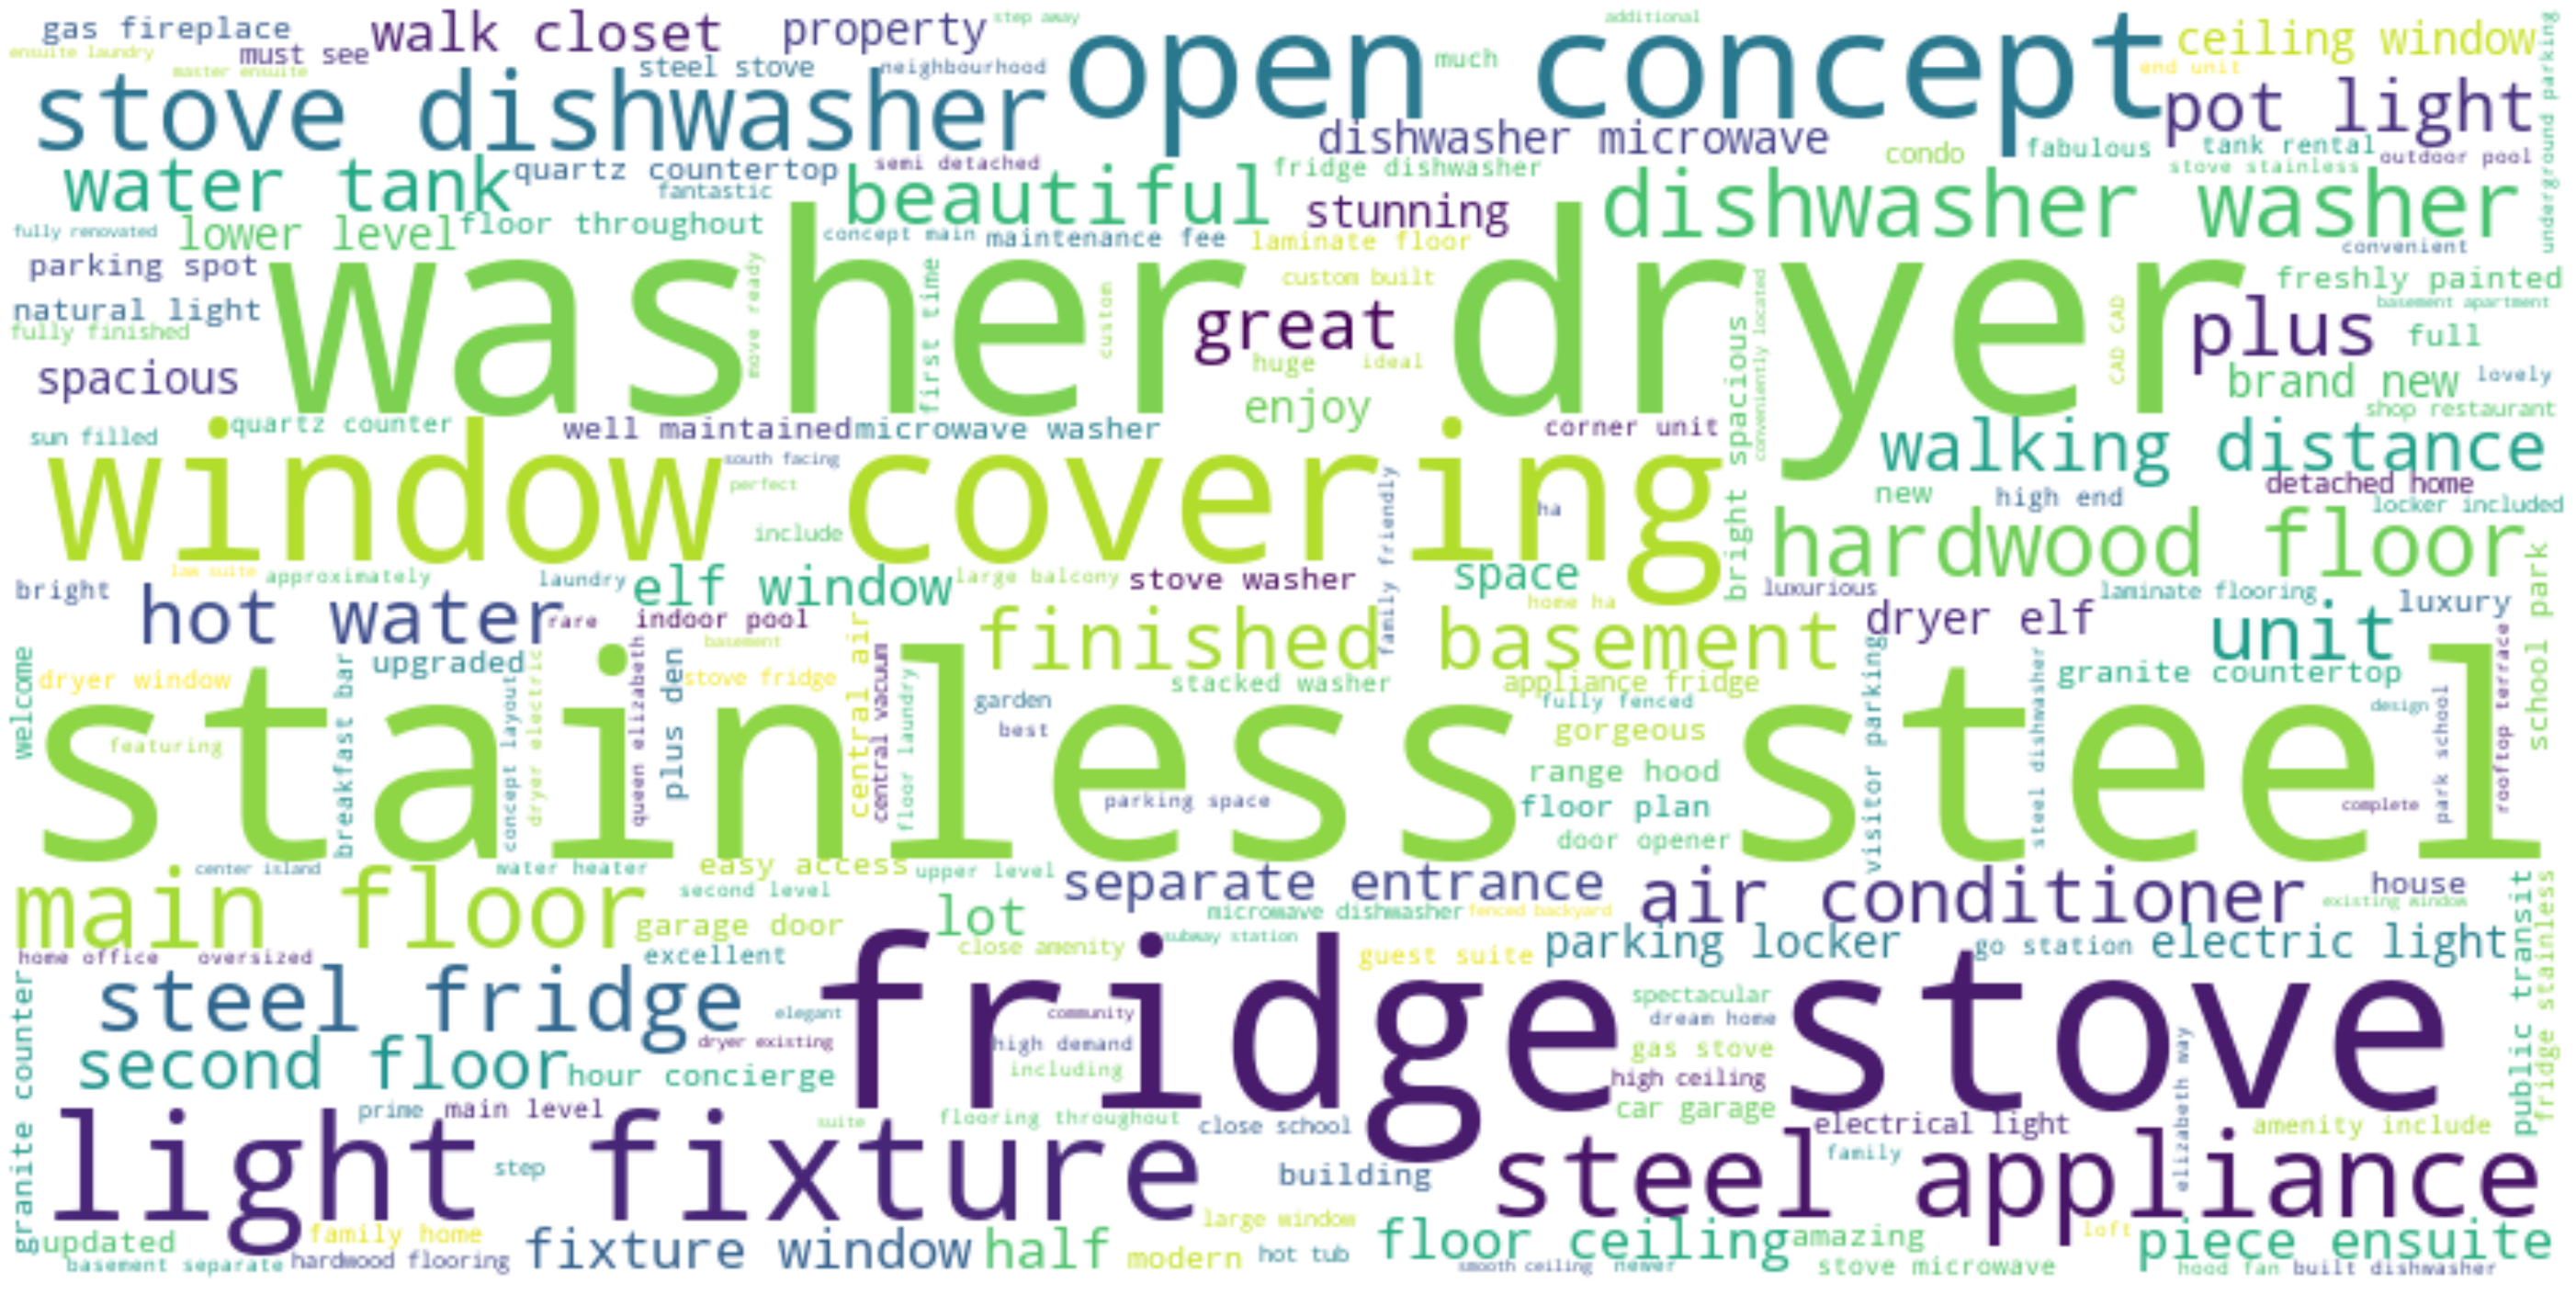

In [184]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)#max_font_size=100, max_words=500,

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (50, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [185]:
df.price.describe()

count      10251.00000
mean     1290211.77095
std      1844750.33430
min        87900.00000
25%       629000.00000
50%       858800.00000
75%      1300000.00000
max     49000000.00000
Name: price, dtype: float64

## word cloud for cheap 5%=515 listings

In [186]:
df_5cheapest=df.sort_values(by=["price"])[:516]

There are 238007 words in the combination of all description.


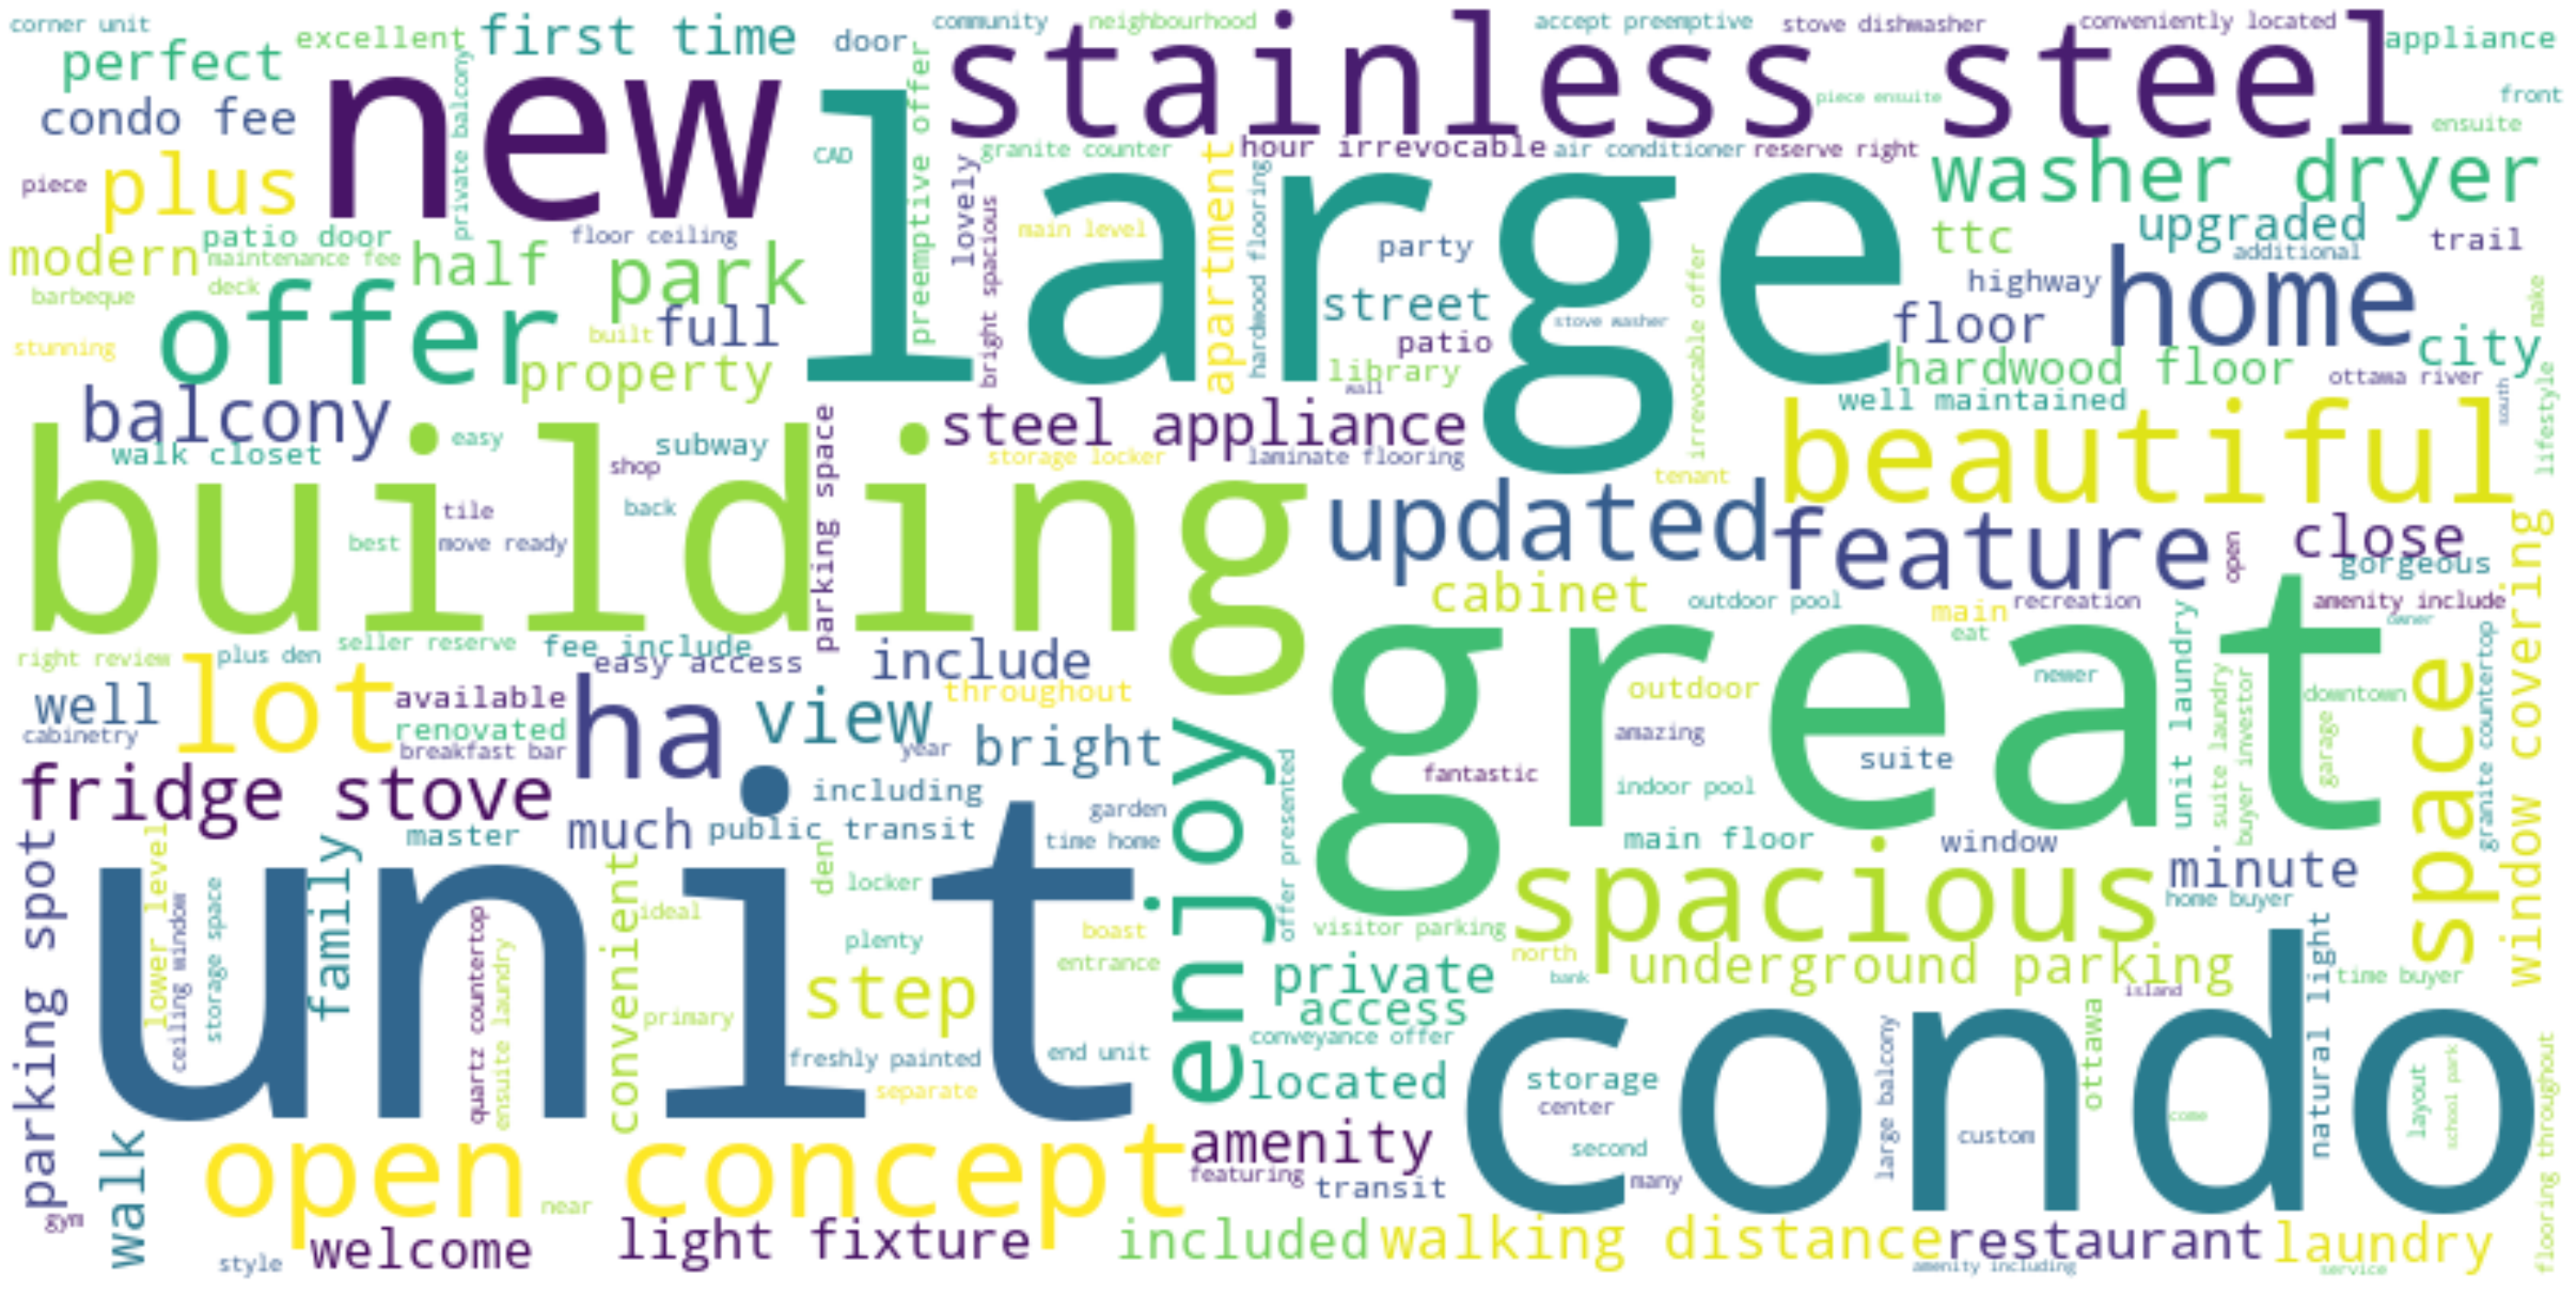

In [187]:
text = " ".join(des for des in df_5cheapest.description)
print ("There are {} words in the combination of all description.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)#max_font_size=100, max_words=500,

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (50, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## word cloud for middle price 1000 listings

In [188]:
df_100middle=df.sort_values(by=["price"])[5000:6001]

There are 471350 words in the combination of all description.


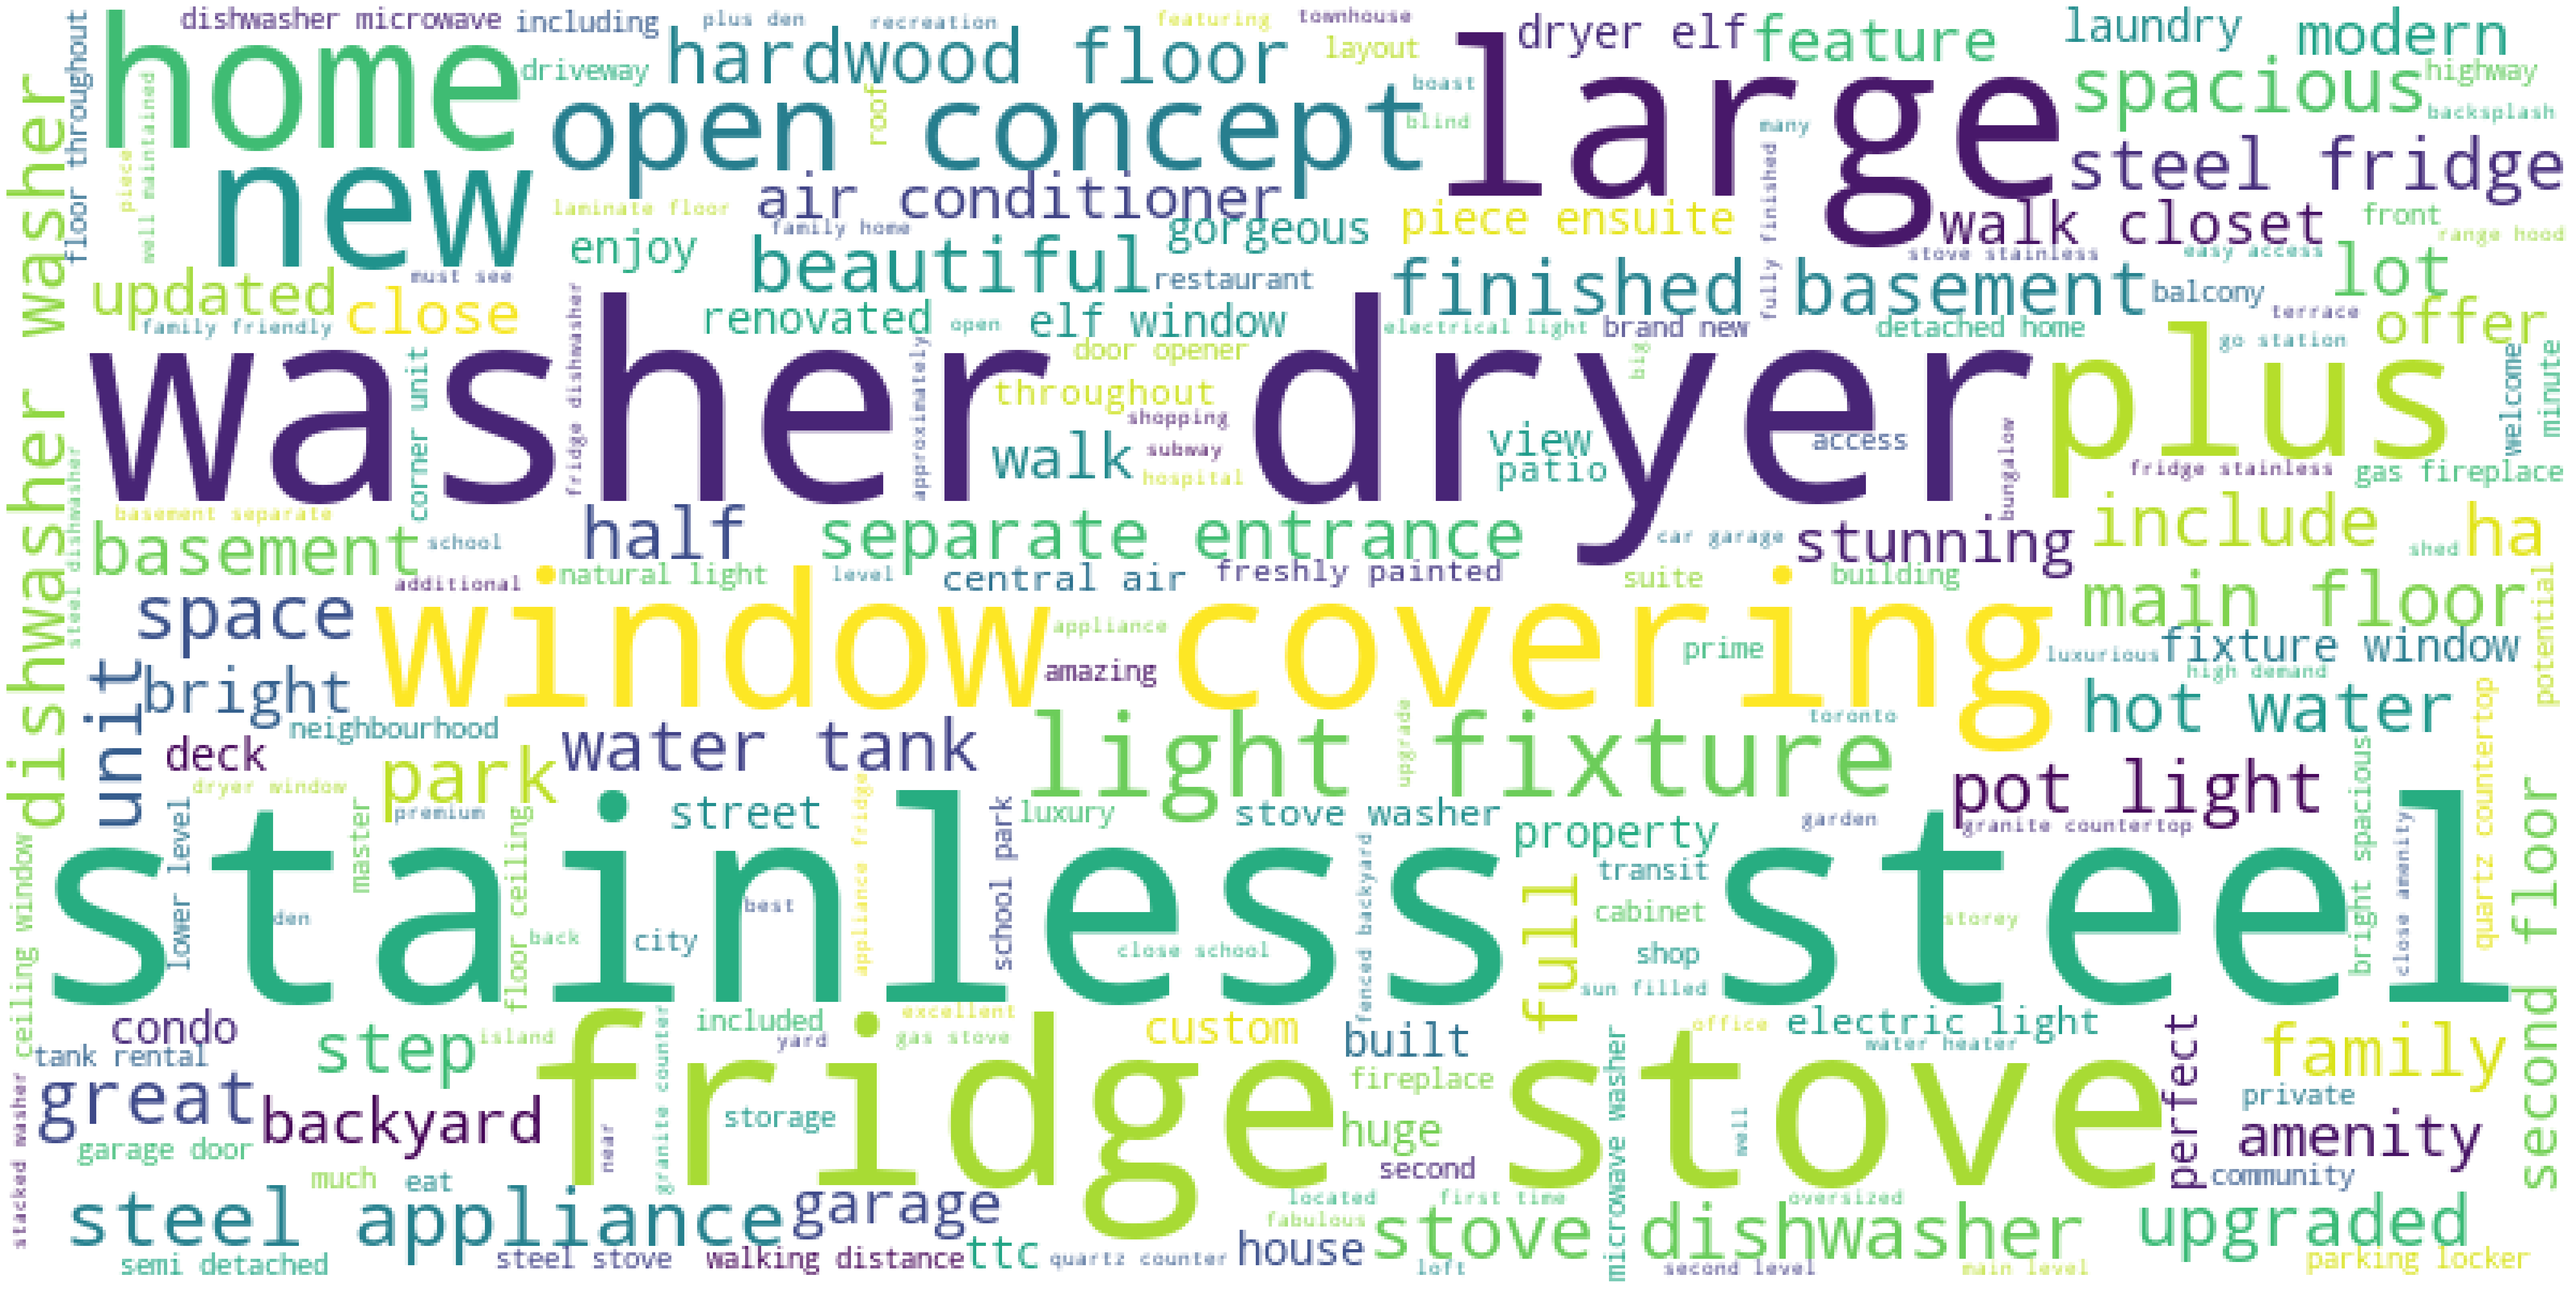

In [189]:
text = " ".join(des for des in df_100middle.description)
print ("There are {} words in the combination of all description.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)#max_font_size=100, max_words=500,

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (100, 100))
plt.imshow(wordcloud, interpolation='None')
plt.axis("off")
plt.show()


## word cloud for most expensive 5%=515 listings

In [190]:
df_5highest=df.sort_values(by=["price"], ascending=False)[:516]

There are 258210 words in the combination of all description.


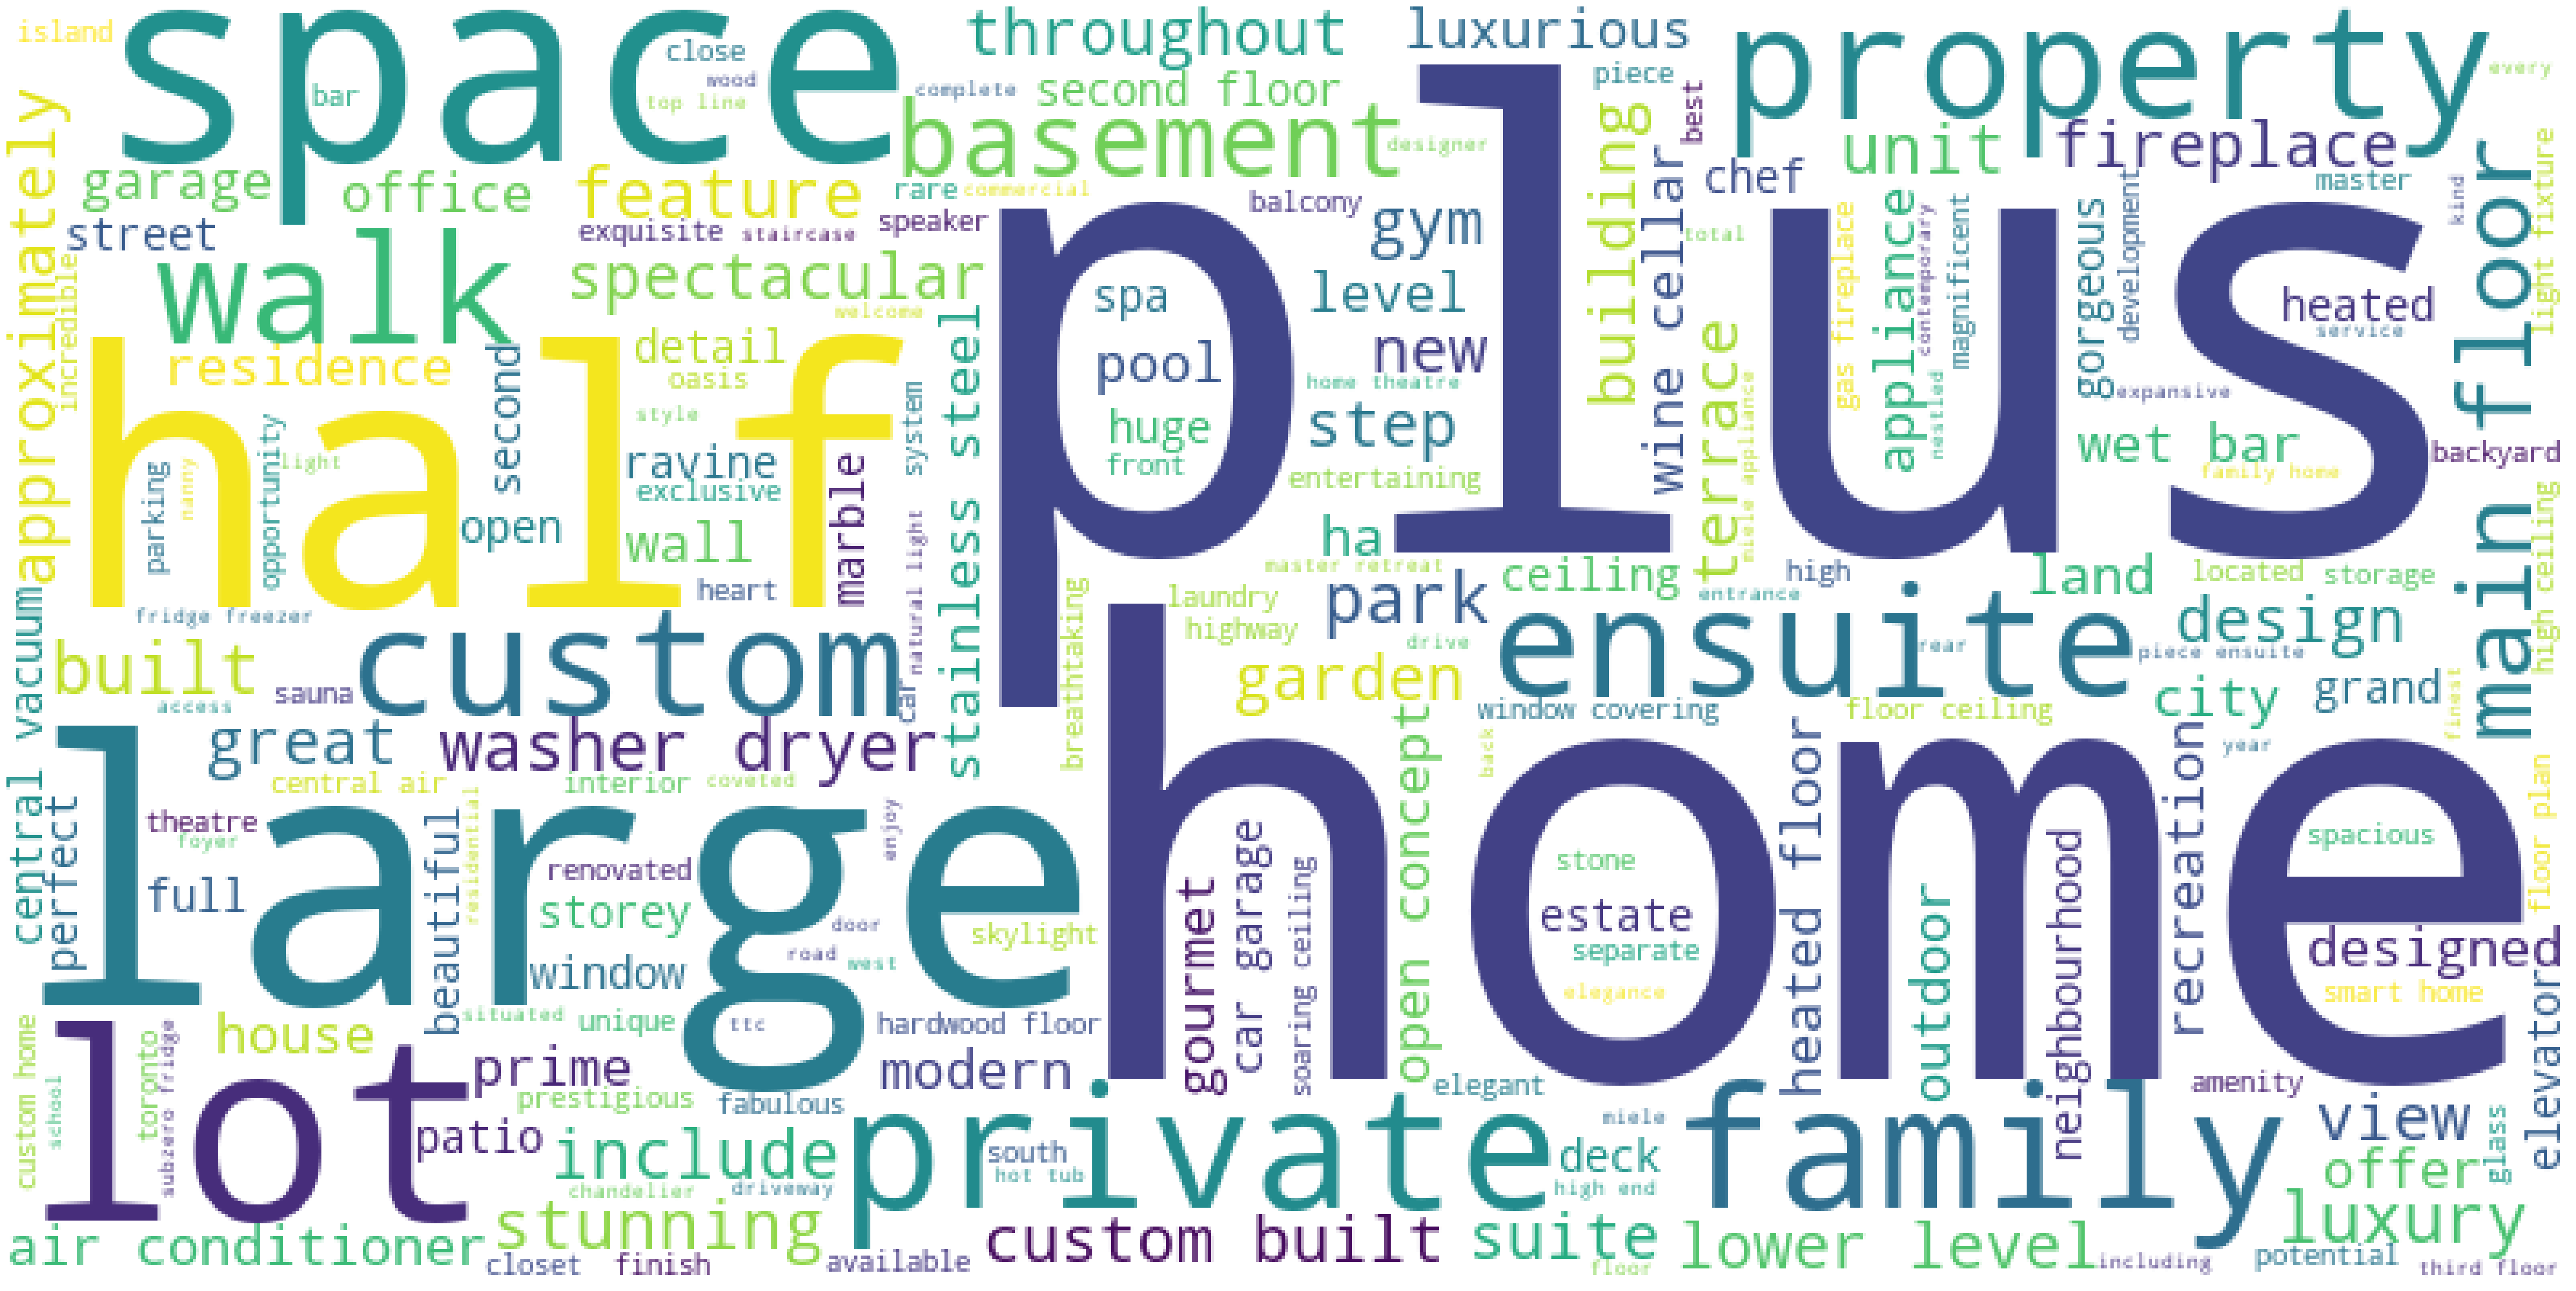

In [191]:
text = " ".join(des for des in df_5highest.description)
print ("There are {} words in the combination of all description.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)#max_font_size=100, max_words=500,

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (100, 100))
plt.imshow(wordcloud, interpolation='None')
plt.axis("off")
plt.show()


## tokenization again

tokeniser = RegexpTokenizer(r'\w+')
df["description"]=df["description"].apply(lambda x: tokeniser.tokenize(x))

## Stemming 

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
df["description"]=df["description"].apply(lambda x: [stemmer.stem(i) for i in x])

df.description.head()

## Detokenization

df["description"]=df["description"].apply(lambda x: " ".join(word for word in x))

## output processed data

df.to_csv(output_folder+"/all_after_preprocessingStopwords.csv", index=False)

## TF-IDF Vectorization

In [192]:
# Create an instance of TfidfVectorizer
# ngram_range: (1,3) from 1-gram to 3-gram are included
# min_df = the smallest number of rows that the word has occured in for the word to be included
# min_df = the largest number of rows that the word has occured in for the word to be included

#consider both unigram, bigram and trigram
vectoriser = TfidfVectorizer(analyzer='word', min_df=0.03, max_df=0.95) # ngram_range=(1,3),

In [193]:
# Fit to the data and transform to feature matrix
# just check the first 5 rows
vectors = vectoriser.fit_transform(df['description'])

In [194]:
feature_names = vectoriser.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_desc = pd.DataFrame(denselist, columns=feature_names)


In [195]:
pd.set_option('float_format', '{:.5f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [196]:
df_desc.head()

10      20    2018    2019    2020    2021      24     401  access  \
0 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
1 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
2 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.15722 0.00000   
3 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
4 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   

   across  additional     air    also  amazing  amenity   ample  apartment  \
0 0.00000     0.00000 0.00000 0.00000  0.00000  0.00000 0.00000    0.00000   
1 0.00000     0.00000 0.00000 0.00000  0.00000  0.00000 0.00000    0.00000   
2 0.00000     0.00000 0.00000 0.00000  0.00000  0.00000 0.00000    0.00000   
3 0.00000     0.00000 0.00000 0.00000  0.00000  0.00000 0.00000    0.00000   
4 0.00000     0.00000 0.00000 0.00000  0.00000  0.00000 0.00000    0.00000   

   appliance  approximately     art  attached  available    away    back  \
0    0.07775        0.15357 0.00000   0.00000    0.00000 0.00000 0.00000   
1    0.00000        0.00000 0.00000   0.00000    0.00000 0.00000 0.00000   
2    0.00000        0.00000 0.00000   0.00000    0.00000 0.00000 0.00000   
3    0.00000        0.00000 0.00000   0.00000    0.00000 0.00000 0.00000   
4    0.09827        0.00000 0.00000   0.00000    0.00000 0.00000 0.00000   

   backsplash  backyard  balcony     bar  barbeque  basement  beautiful  \
0     0.00000   0.10863  0.00000 0.00000   0.00000   0.17237    0.10462   
1     0.00000   0.00000  0.00000 0.00000   0.00000   0.10798    0.00000   
2     0.00000   0.00000  0.00000 0.00000   0.00000   0.19865    0.00000   
3     0.00000   0.00000  0.00000 0.00000   0.00000   0.22364    0.00000   
4     0.00000   0.00000  0.00000 0.00000   0.00000   0.00000    0.26445   

   beautifully    best     big   blind   boast  boutique   brand  breakfast  \
0      0.00000 0.00000 0.00000 0.00000 0.00000   0.00000 0.00000    0.00000   
1      0.00000 0.19593 0.00000 0.00000 0.00000   0.00000 0.18211    0.17968   
2      0.00000 0.00000 0.00000 0.00000 0.00000   0.00000 0.00000    0.00000   
3      0.00000 0.00000 0.00000 0.00000 0.00000   0.00000 0.00000    0.00000   
4      0.00000 0.00000 0.00000 0.00000 0.00000   0.00000 0.18371    0.00000   

    brick  bright   build  builder  building   built  bungalow     bus  \
0 0.00000 0.10626 0.00000  0.00000   0.00000 0.00000   0.00000 0.00000   
1 0.00000 0.00000 0.00000  0.40942   0.00000 0.00000   0.00000 0.00000   
2 0.00000 0.00000 0.00000  0.00000   0.00000 0.00000   0.00000 0.00000   
3 0.00000 0.00000 0.00000  0.00000   0.00000 0.00000   0.00000 0.20663   
4 0.00000 0.00000 0.00000  0.00000   0.00000 0.00000   0.00000 0.00000   

    buyer  cabinet  cabinetry     cad     car  ceiling  center  central  \
0 0.00000  0.00000    0.00000 0.00000 0.12449  0.00000 0.00000  0.00000   
1 0.00000  0.00000    0.00000 0.00000 0.00000  0.00000 0.00000  0.00000   
2 0.00000  0.00000    0.00000 0.00000 0.00000  0.00000 0.00000  0.00000   
3 0.00000  0.00000    0.00000 0.00000 0.00000  0.00000 0.00000  0.00000   
4 0.00000  0.00000    0.00000 0.00000 0.00000  0.11102 0.00000  0.00000   

   ceramic    chef    city   close  closet  college    come  community  \
0  0.00000 0.00000 0.00000 0.00000 0.00000  0.00000 0.00000    0.13683   
1  0.00000 0.00000 0.00000 0.00000 0.00000  0.00000 0.20928    0.17142   
2  0.00000 0.00000 0.00000 0.10645 0.00000  0.00000 0.00000    0.00000   
3  0.00000 0.00000 0.00000 0.11984 0.00000  0.21824 0.00000    0.00000   
4  0.00000 0.00000 0.00000 0.00000 0.00000  0.00000 0.00000    0.00000   

   complete  concept  concierge  concrete  condition  conditioner   condo  \
0   0.00000  0.09297    0.00000   0.17402    0.00000      0.00000 0.00000   
1   0.00000  0.00000    0.00000   0.00000    0.00000      0.00000 0.27872   
2   0.00000  0.00000    0.00000   0.00000    0.00000      0.00000 0.00000   
3   0.00000  0.00000    0.00000   0.00000  

In [197]:
list(df_desc.columns)

['10',
 '20',
 '2018',
 '2019',
 '2020',
 '2021',
 '24',
 '401',
 'access',
 'across',
 'additional',
 'air',
 'also',
 'amazing',
 'amenity',
 'ample',
 'apartment',
 'appliance',
 'approximately',
 'art',
 'attached',
 'available',
 'away',
 'back',
 'backsplash',
 'backyard',
 'balcony',
 'bar',
 'barbeque',
 'basement',
 'beautiful',
 'beautifully',
 'best',
 'big',
 'blind',
 'boast',
 'boutique',
 'brand',
 'breakfast',
 'brick',
 'bright',
 'build',
 'builder',
 'building',
 'built',
 'bungalow',
 'bus',
 'buyer',
 'cabinet',
 'cabinetry',
 'cad',
 'car',
 'ceiling',
 'center',
 'central',
 'ceramic',
 'chef',
 'city',
 'close',
 'closet',
 'college',
 'come',
 'community',
 'complete',
 'concept',
 'concierge',
 'concrete',
 'condition',
 'conditioner',
 'condo',
 'convenient',
 'cooktop',
 'corner',
 'counter',
 'countertop',
 'court',
 'covering',
 'cozy',
 'crown',
 'custom',
 'deck',
 'demand',
 'den',
 'design',
 'designed',
 'desirable',
 'detached',
 'development',
 'dis

In [198]:
len(df_desc.columns)

412

In [199]:
pd.set_option('display.max_colwidth', None) #description full display


## The word, and the number of non-zero rows

In [200]:
df_desc.astype(bool).sum(axis=0)

10                827
20                331
2018              365
2019              424
2020              548
2021              585
24               1335
401               898
access           1907
across            339
additional        482
air              1311
also              397
amazing           766
amenity          2800
ample             392
apartment         539
appliance        3936
approximately     583
art               329
attached          376
available         663
away              552
back              671
backsplash        821
backyard         1809
balcony          2155
bar               981
barbeque          879
basement         3183
beautiful        2001
beautifully       441
best              543
big               316
blind             775
boast             537
boutique          334
brand             717
breakfast         753
brick             479
bright           1920
build             513
builder           455
building         1520
built            1899
bungalow  

In [201]:
labels_price=df["price"]

In [202]:
labels_price.head()

0     958800
1     970000
2    1249900
3    1249900
4    1249900
Name: price, dtype: int64

In [203]:
df_desc.head()

10      20    2018    2019    2020    2021      24     401  access  \
0 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
1 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
2 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.15722 0.00000   
3 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
4 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   

   across  additional     air    also  amazing  amenity   ample  apartment  \
0 0.00000     0.00000 0.00000 0.00000  0.00000  0.00000 0.00000    0.00000   
1 0.00000     0.00000 0.00000 0.00000  0.00000  0.00000 0.00000    0.00000   
2 0.00000     0.00000 0.00000 0.00000  0.00000  0.00000 0.00000    0.00000   
3 0.00000     0.00000 0.00000 0.00000  0.00000  0.00000 0.00000    0.00000   
4 0.00000     0.00000 0.00000 0.00000  0.00000  0.00000 0.00000    0.00000   

   appliance  approximately     art  attached  available    away    back  \
0    0.07775        0.15357 0.00000   0.00000    0.00000 0.00000 0.00000   
1    0.00000        0.00000 0.00000   0.00000    0.00000 0.00000 0.00000   
2    0.00000        0.00000 0.00000   0.00000    0.00000 0.00000 0.00000   
3    0.00000        0.00000 0.00000   0.00000    0.00000 0.00000 0.00000   
4    0.09827        0.00000 0.00000   0.00000    0.00000 0.00000 0.00000   

   backsplash  backyard  balcony     bar  barbeque  basement  beautiful  \
0     0.00000   0.10863  0.00000 0.00000   0.00000   0.17237    0.10462   
1     0.00000   0.00000  0.00000 0.00000   0.00000   0.10798    0.00000   
2     0.00000   0.00000  0.00000 0.00000   0.00000   0.19865    0.00000   
3     0.00000   0.00000  0.00000 0.00000   0.00000   0.22364    0.00000   
4     0.00000   0.00000  0.00000 0.00000   0.00000   0.00000    0.26445   

   beautifully    best     big   blind   boast  boutique   brand  breakfast  \
0      0.00000 0.00000 0.00000 0.00000 0.00000   0.00000 0.00000    0.00000   
1      0.00000 0.19593 0.00000 0.00000 0.00000   0.00000 0.18211    0.17968   
2      0.00000 0.00000 0.00000 0.00000 0.00000   0.00000 0.00000    0.00000   
3      0.00000 0.00000 0.00000 0.00000 0.00000   0.00000 0.00000    0.00000   
4      0.00000 0.00000 0.00000 0.00000 0.00000   0.00000 0.18371    0.00000   

    brick  bright   build  builder  building   built  bungalow     bus  \
0 0.00000 0.10626 0.00000  0.00000   0.00000 0.00000   0.00000 0.00000   
1 0.00000 0.00000 0.00000  0.40942   0.00000 0.00000   0.00000 0.00000   
2 0.00000 0.00000 0.00000  0.00000   0.00000 0.00000   0.00000 0.00000   
3 0.00000 0.00000 0.00000  0.00000   0.00000 0.00000   0.00000 0.20663   
4 0.00000 0.00000 0.00000  0.00000   0.00000 0.00000   0.00000 0.00000   

    buyer  cabinet  cabinetry     cad     car  ceiling  center  central  \
0 0.00000  0.00000    0.00000 0.00000 0.12449  0.00000 0.00000  0.00000   
1 0.00000  0.00000    0.00000 0.00000 0.00000  0.00000 0.00000  0.00000   
2 0.00000  0.00000    0.00000 0.00000 0.00000  0.00000 0.00000  0.00000   
3 0.00000  0.00000    0.00000 0.00000 0.00000  0.00000 0.00000  0.00000   
4 0.00000  0.00000    0.00000 0.00000 0.00000  0.11102 0.00000  0.00000   

   ceramic    chef    city   close  closet  college    come  community  \
0  0.00000 0.00000 0.00000 0.00000 0.00000  0.00000 0.00000    0.13683   
1  0.00000 0.00000 0.00000 0.00000 0.00000  0.00000 0.20928    0.17142   
2  0.00000 0.00000 0.00000 0.10645 0.00000  0.00000 0.00000    0.00000   
3  0.00000 0.00000 0.00000 0.11984 0.00000  0.21824 0.00000    0.00000   
4  0.00000 0.00000 0.00000 0.00000 0.00000  0.00000 0.00000    0.00000   

   complete  concept  concierge  concrete  condition  conditioner   condo  \
0   0.00000  0.09297    0.00000   0.17402    0.00000      0.00000 0.00000   
1   0.00000  0.00000    0.00000   0.00000    0.00000      0.00000 0.27872   
2   0.00000  0.00000    0.00000   0.00000    0.00000      0.00000 0.00000   
3   0.00000  0.00000    0.00000   0.00000  

## check the sum of the tf-idf score for cheapest 515 and most expensive 515 listings

In [204]:
df_desc2=df_desc.copy()
df_desc22=pd.concat([df_desc2,labels_price], axis=1)

In [205]:
df_5cheapest=df_desc22.sort_values(by=["price"])[:516]
sums_cheap = df_5cheapest.sum().rename('total')

df_5expensive=df_desc22.sort_values(by=["price"], ascending=False)[:516]
sums_expensive=df_5expensive.sum().rename('total')

In [206]:
sums_cheap.sort_values(ascending=False)[1:20]


unit       40.85409
offer      35.15914
condo      34.31430
parking    28.91822
building   26.14001
balcony    23.66868
space      23.04360
located    22.30027
storage    22.01272
great      21.74795
laundry    21.27786
close      21.03174
ha         20.56869
large      20.46698
home       20.18726
well       20.18662
amenity    19.87819
view       18.86773
spacious   18.46803
Name: total, dtype: float64

In [207]:
sums_expensive.sort_values(ascending=False)[1:20]


home       41.16929
floor      34.73678
custom     31.54568
plus       29.74834
property   23.06646
ceiling    23.05217
heated     22.90549
lot        22.50983
private    22.38505
half       22.24104
built      22.03027
wine       20.72211
gas        20.51988
walk       19.95650
space      19.80998
pool       18.65452
level      18.40401
street     18.38634
suite      18.38052
Name: total, dtype: float64

## Normalization of price

In [208]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
labels_price = pd.DataFrame(scaler.fit_transform(pd.DataFrame(labels_price)))

In [209]:
labels_price.describe()

0
count 10251.00000
mean      0.02458
std       0.03772
min       0.00000
25%       0.01106
50%       0.01576
75%       0.02478
max       1.00000

## Save the MinMax Scaler model

import joblib
joblib.dump(scaler, output_folder+"/minmax_scaler.gz")

## Or Log of the price

labels_price = np.log2(labels_price)


labels_price.describe()

## Check the distribution of price column (logged price, or normalized price)

import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 8]})
sns.distplot(
    labels_price, norm_hist=False, kde=True, bins=40, hist_kws={"alpha": 1}).set(xlabel='price', ylabel='count');

## Try Use Gradient Boosting only on description data (TF-IDF converted)

## implement MAPE(mean absolute percentage error) as customized scorer

from sklearn.metrics import make_scorer
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



MAPE=make_scorer(mean_absolute_percentage_error, greater_is_better=False)

## divide dataset into training data and testing data

In [210]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math 

X_train, X_test, y_train, y_test = train_test_split(
    df_desc, labels_price, test_size=0.1, random_state=46) #random state=13 originally

## Grid Search
### Long Short Term Memory, when only description data is used

In [211]:
input_dimension=len(X_train.columns)

In [212]:
input_dimension

412

In [213]:
X_train.shape[1]

412

In [214]:
X_train.shape[1:]

(412,)

In [215]:
X_train.shape

(9225, 412)

In [216]:
# Convert it to 3d because LSTM wants 3d input
#X_train=X_train.to_numpy()
#X_train = X_train[:, :, None]

In [217]:
X_train.shape

(9225, 412)

#### Function to create model, required for KerasClassifier

In [218]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD

def create_model(learn_rate=0.001, amsgrad=False, activation='relu', dropout_rate=0.0, neurons=50):
    # create model
    # The maximum number of words to be used. (most frequent)
    #MAX_NB_WORDS = 50000
    # embedding dimension
    #EMBEDDING_DIM = 100
    #model.add(Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
    #model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
    #model.add(LSTM(50))

    model = Sequential()
    model.add(Dense(neurons, activation=activation)) #input_shape=(X_train.shape[1],), return_sequences = True
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons*2, activation=activation))
    model.add(Dropout(dropout_rate/2))
    model.add(Dense(neurons, activation=activation))

    
    model.add(Dense(1, activation='sigmoid')) #

    # Compile model
    optimizer = Adam(learning_rate=learn_rate, amsgrad=amsgrad)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
# create model
model = KerasRegressor(build_fn=create_model, verbose=10) #epochs=75, batch_size=10, verbose=10)
# define the grid search parameters
#optimizer = ['Adam'] 
batch_size = [10,20] # 5, 
epochs = [50, 75, 100] # ,
learn_rate = [0.0001,0.001,0.01] #0.0001, , 0.01
amsgrad = [False] # True,  #True,
activation = ['relu', 'sigmoid']#, 'softplus'] #, 'sigmoid','softplus'] #, , 'softsign', 'hard_sigmoid', 'softmax', #, 'linear' 
dropout_rate = [0.1,0.2] #,0.3]#, 0.2] #0.0,, 0.3, 0.5 0.4, 0.2,, 0.3, 0.4, 0.5, 0.7
neurons = [50, 100] #25, 50, 100, 150,300, 200


param_grid = dict(batch_size=batch_size, epochs=epochs, learn_rate=learn_rate, amsgrad=amsgrad, activation=activation, dropout_rate=dropout_rate, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=10, scoring=('r2', 'neg_root_mean_squared_error'), refit='r2')
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100

In [219]:
print("-------------------------------------------------------------------")
print("Neural Network Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid.cv_results_['params']
r2_scores=grid.cv_results_['mean_test_r2']
rmse_scores=grid.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


-------------------------------------------------------------------
Neural Network Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:

 The best r2 score across ALL searched params:
 0.5200444214571699

 The best parameters across ALL searched params:
 {'activation': 'sigmoid', 'amsgrad': False, 'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 100, 'learn_rate': 0.01, 'neurons': 50}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'activation': 'relu', 'amsgrad': False, 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'learn_rate': 0.0001, 'neurons': 50}


test r2 score:0.47807211995623


test RMSE score:0.025488363442068812
-------------------------------------------------------------------
parameter combinations:{'activation': 'relu', 'amsgrad': False, 'batch_size': 10, '

In [220]:
gd_result = pd.DataFrame(grid.cv_results_)
gd_result=gd_result[['param_batch_size','param_epochs', 'param_neurons','param_activation','param_learn_rate', 'param_dropout_rate', 'mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_batch_size param_epochs param_neurons param_activation  \
106               10          100            50          sigmoid   
49                20          100           100             relu   
141               20          100           100          sigmoid   
1                 10           50           100             relu   
2                 10           50            50             relu   
39                20           50           100             relu   
3                 10           50           100             relu   
19                10           50           100             relu   
130               20           50            50          sigmoid   
6                 10           75            50             relu   
57                20           50           100             relu   
31                10          100           100             relu   
13                10          100           100             relu   
136               20           75            50          sigmoid   
99                10           75           100          sigmoid   
9                 10           75           100             relu   
135               20           75           100          sigmoid   
15                10          100           100             relu   
51                20          100           100             relu   
104               10          100            50          sigmoid   
12                10          100            50             relu   
129               20           50           100          sigmoid   
48                20          100            50             relu   
43                20           75           100             relu   
134               20           75            50          sigmoid   
60                20           75            50             relu   
117               20           75           100          sigmoid   
7                 10           75           100             relu   
45                20           75           100             relu   
92                10           50            50          sigmoid   
36                20           50            50             relu   
55                20           50           100             relu   
14                10          100            50             relu   
98                10           75            50          sigmoid   
61                20           75           100             relu   
140               20          100            50          sigmoid   
67                20          100           100             relu   
18                10           50            50             relu   
42                20           75            50             relu   
124               20          100            50          sigmoid   
75                10           50           100          sigmoid   
123               20          100           100          sigmoid   
25                10           75           100             relu   
81                10           75           100          sigmoid   
37                20           50           100             relu   
105               10          100           100          sigmoid   
0                 10           50            50             relu   
118               20           75            50          sigmoid   
93                10           50           100          sigmoid   
122               20          100            50          sigmoid   

    param_learn_rate param_dropout_rate  mean_test_r2  \
106          0.01000            0.20000       0.52004   
49           0.00010            0.10000       0.51591   
141          0.00100            0.20000       0.51533   
1            0.00010            0.10000       0.51414   
2            0.00100            0.10000       0.51365   
39           0.00100            0.10000       0.51273   
3            0.00100            0.10000       0.51201   
19           0.00010            0.20000       0.50950   
130          0.01000  

In [221]:
gd_result.to_csv(output_folder+"/"+"gridsearch_NN_TF_IDF_descriptiononly_5fold_bound.csv", index=False)

## Grid Search
### Random Forest, when only description data is used

In [171]:
import numpy as np
from sklearn import ensemble
GBR = ensemble.RandomForestRegressor()


parameters = {'bootstrap': [True, False],
              'max_depth': [5, 10, 20, 30, None],
              'max_features': ['auto', 'sqrt'],
              'n_estimators': [32, 64, 100, 500, 1000]}

y_train_flat=np.ravel(y_train)

from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters,scoring=('r2', 'neg_root_mean_squared_error'),refit='r2', verbose=10, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, y_train_flat)

print("-------------------------------------------------------------------")
print("Gradient Boosting Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid_GBR.cv_results_['params']
r2_scores=grid_GBR.cv_results_['mean_test_r2']
rmse_scores=grid_GBR.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


df_gridsearch_result = pd.DataFrame(grid_GBR.cv_results_)


gd_result=df_gridsearch_result[['param_n_estimators','param_max_depth','param_max_features','param_bootstrap','mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]

Fitting 5 folds for each of 100 candidates, totalling 500 fits
-------------------------------------------------------------------
Gradient Boosting Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=500)

 The best r2 score across ALL searched params:
 0.37190406733324655

 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 32}


test r2 score:0.10571639094104927


test RMSE score:0.03351703877986755
-------------------------------------------------------------------
parameter combinations:{'bootstrap

In [172]:
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_n_estimators param_max_depth param_max_features param_bootstrap  \
98                500            None               sqrt           False   
97                100            None               sqrt           False   
99               1000            None               sqrt           False   
88                500              30               sqrt           False   
89               1000              30               sqrt           False   
87                100              30               sqrt           False   
95                 32            None               sqrt           False   
96                 64            None               sqrt           False   
86                 64              30               sqrt           False   
79               1000              20               sqrt           False   
76                 64              20               sqrt           False   
77                100              20               sqrt           False   
78                500              20               sqrt           False   
48                500            None               sqrt            True   
85                 32              30               sqrt           False   
49               1000            None               sqrt            True   
39               1000              30               sqrt            True   
38                500              30               sqrt            True   
36                 64              30               sqrt            True   
46                 64            None               sqrt            True   
75                 32              20               sqrt           False   
47                100            None               sqrt            True   
37                100              30               sqrt            True   
29               1000              20               sqrt            True   
28                500              20               sqrt            True   
27                100              20               sqrt            True   
45                 32            None               sqrt            True   
26                 64              20               sqrt            True   
35                 32              30               sqrt            True   
25                 32              20               sqrt            True   
43                500            None               auto            True   
44               1000            None               auto            True   
42                100            None               auto            True   
41                 64            None               auto            True   
69               1000              10               sqrt           False   
68                500              10               sqrt           False   
33                500              30               auto            True   
34               1000              30               auto            True   
67                100              10               sqrt           False   
66                 64              10               sqrt           False   
65                 32              10               sqrt           False   
40                 32            None               auto            True   
30                 32              30               auto            True   
32                100              30               auto            True   
16                 64              10               sqrt            True   
23                500              20               auto            True   
24               1000              20               auto            True   
18                500              10               sqrt            True   
19               1000              10               sqrt            True   
22                100              20               auto            True   

    mean_test_r2  mean_test_neg_root_mean_squared_error  
98       0.37190                               -0.02797  
97       0

In [173]:
gd_result.to_csv(output_folder+"/"+"gridsearch_randomforest_TF_IDF_descriptiononly_5fold.csv", index=False)

## Grid Search
### Gradient Boosting, when only description data is used

In [107]:
import numpy as np
from sklearn import ensemble
GBR = ensemble.GradientBoostingRegressor()

parameters = {'n_estimators' : [500,1000], # 100 removed
              'max_depth'    : [4,6], # 3 removed
              'learning_rate': [0.01,0.02], # 0.005 removed
              'subsample'    : [1, 0.8] 
             }

y_train_flat=np.ravel(y_train)

from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters,scoring=('r2', 'neg_root_mean_squared_error'),refit='r2', verbose=10, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, y_train_flat)

print("-------------------------------------------------------------------")
print("Gradient Boosting Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid_GBR.cv_results_['params']
r2_scores=grid_GBR.cv_results_['mean_test_r2']
rmse_scores=grid_GBR.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


df_gridsearch_result = pd.DataFrame(grid_GBR.cv_results_)


gd_result=df_gridsearch_result[['param_n_estimators','param_max_depth','param_learning_rate','param_subsample','mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]

Fitting 5 folds for each of 16 candidates, totalling 80 fits
-------------------------------------------------------------------
Gradient Boosting Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=1000,
                          subsample=0.8)

 The best r2 score across ALL searched params:
 0.36358737547343223

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.8}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 1}


test r2 score:0.25049484349675266


test RMSE score:0.030549052907133063
-------------------------------------------------------------------
pa

In [108]:
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_n_estimators param_max_depth param_learning_rate param_subsample  \
15               1000               6             0.02000         0.80000   
14               1000               6             0.02000               1   
6                1000               6             0.01000               1   
12                500               6             0.02000               1   
7                1000               6             0.01000         0.80000   
13                500               6             0.02000         0.80000   
4                 500               6             0.01000               1   
11               1000               4             0.02000         0.80000   
5                 500               6             0.01000         0.80000   
10               1000               4             0.02000               1   
3                1000               4             0.01000         0.80000   
9                 500               4             0.02000         0.80000   
8                 500               4             0.02000               1   
2                1000               4             0.01000               1   
1                 500               4             0.01000         0.80000   
0                 500               4             0.01000               1   

    mean_test_r2  mean_test_neg_root_mean_squared_error  
15       0.36359                               -0.02818  
14       0.35756                               -0.02819  
6        0.35555                               -0.02823  
12       0.35214                               -0.02835  
7        0.35006                               -0.02848  
13       0.34962                               -0.02853  
4        0.32793                               -0.02887  
11       0.32573                               -0.02901  
5        0.31654                               -0.02922  
10       0.31298                               -0.02921  
3        0.30064                               -0.02958  
9        0.30013                               -0.02960  
8        0.29422                               -0.02964  
2        0.28955                               -0.02973  
1        0.25670                               -0.03050  
0        0.25049                               -0.03055

In [109]:
gd_result.to_csv(output_folder+"/"+"gridsearch_gradientboosting_TF_IDF_descriptiononly_5fold.csv", index=False)

## These blocks may take some minutes

In [108]:
import numpy as np 
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)

y_train_flat=np.ravel(y_train)
reg.fit(X_train, y_train_flat)

#mse = mean_squared_error(y_test, reg.predict(X_test), squared=False)

#print("The root mean squared error (RMSE) on test set: {:.4f}".format(mse))

KeyboardInterrupt: 

In [ ]:
## Check how long it takes to finish the cross-validation
import time
tic = time.perf_counter()

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(reg, X_train, y_train_flat, scoring=('r2', 'neg_root_mean_squared_error'), cv=10, return_train_score=True)

In [ ]:
from sklearn import metrics
sorted(metrics.SCORERS.keys())

In [ ]:
scores

In [ ]:
print("RMSE training Score using cv: {:0.5f}".format(scores['train_neg_root_mean_squared_error'].mean() * -1))

In [ ]:
print("RMSE test Score using cv: {:0.5f}".format(scores['test_neg_root_mean_squared_error'].mean() * -1))

In [ ]:
print("R2 training Score using cv: {:0.5f}".format(scores['train_r2'].mean() * -1))

In [ ]:
print("R2 test Score using cv: {:0.5f}".format(scores['test_r2'].mean() * -1))

In [ ]:
toc = time.perf_counter()
print(f"Finish cross validation in  {toc - tic:0.4f} seconds")

tic = time.perf_counter()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(reg, X_train, y_train_flat, scoring="r2", cv=10)
print("RMSE test Score using cv_score: {:0.5f}".format(scores.mean() * -1))

toc = time.perf_counter()
print(f"Finish cross validation in  {toc - tic:0.4f} seconds")

## try to use all the features to predict

## numerical features

In [222]:
numerical_features=["bedroom","bedroomAboveGrade","bedroomBelowGrade","bathroom", "bathroomTotal","bathroomPartial", "totalParkingSpaces", "storeys", "maintenanceFees",  'landSize', 'longitude', "latitude"]

In [223]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_num=df[numerical_features]
X_num.head()

bedroom  bedroomAboveGrade  bedroomBelowGrade  bathroom  bathroomTotal  \
0        5                  4                  1   4.00000              4   
1        3                  3                  0   4.00000              4   
2        7                  4                  3   4.00000              4   
3        6                  4                  2   4.00000              4   
4        4                  4                  0   4.00000              4   

   bathroomPartial  totalParkingSpaces  storeys  maintenanceFees   landSize  \
0                0                   4  2.00000        670.51000 2230.14750   
1                0                   1  3.00000        670.51000    0.00000   
2                0                   8  2.00000        670.51000 4620.00000   
3                0                   4  2.00000        670.51000 5063.68080   
4                0                   4  2.50000        670.51000 3169.00000   

   longitude  latitude  
0  -79.79530  43.73280  
1  -79.78760  43.62490  
2  -79.78760  43.62490  
3  -79.78760  43.62490  
4  -79.78760  43.62490

## Normalization for numerical data (exclude longitude and latitude) using MinMaxScaler


In [224]:
from sklearn.preprocessing import MinMaxScaler
# recaling the variables (both)
X_num_columns = X_num.columns
scaler = MinMaxScaler()
X_num = scaler.fit_transform(X_num)

# rename columns (since now its an np array)
X_num = pd.DataFrame(X_num)
X_num.columns = X_num_columns



## Normalization for longitude and latitude sepeparately

In [225]:
X_num.drop(["longitude", "latitude"], axis=1)
normed_long= df["longitude"] *0.01
normed_lat= df["latitude"] *0.01
X_num=pd.concat([X_num, normed_long, normed_lat], axis=1)

## Boolean features

In [226]:
boolean_features=['parkingAttachedGarage',
       'parkingUnderground', 'parkingInsideEntry', 'parkingSurfaced',
       'parkingOversize', 'parkingGravel', 'parkingGarage', 'parkingShared',
       'parkingDetachedGarage', 'parkingCarport', 'parkingInterlocked',
       'parkingVisitorParking','amenityClubhouse', 'amenityCarWash', 'amenityMusicRoom',
       'amenityStorageLocker', 'amenitySauna', 'amenityPartyRoom',
       'amenityRecreationCentre', 'amenityGuestSuite', 'amenityFurnished',
       'amenityLaundryFacility', 'amenityExerciseCentre',
       'amenityLaundryInSuite', 'amenitySecurity', 'amenityWhirlpool',
       'efinishWood', 'efinishBrick', 'efinishHardboard', 'efinishWoodsiding',
       'efinishLog', 'efinishMetal', 'efinishSteel', 'efinishStone',
       'efinishWoodshingles', 'efinishStucco', 'efinishSiding',
       'efinishConcrete', 'efinishShingles', 'efinishAluminumsiding',
       'efinishCedarshingles', 'efinishVinyl', 'efinishVinylsiding',
       'featurePetNotAllowed', 'AirportNearby',
       'GolfNearby', 'MarinaNearby', 'ShoppingNearby', 'WaterNearby',
       'WorshipPlaceNearby', 'RecreationNearby', 'PlaygroundNearby',
       'PublicTransitNearby', 'ParkNearby', 'SchoolsNearby', 'HospitalNearby',
       'HighwayNearby', 'SkiAreaNearby']

X_boo=df[boolean_features]

## Convert categorical data with string values into numerical values

In [227]:
X_category=df[['city', 'typeBuilding', 'title', 'styleAttach', 
       'cooling', 'basementType', 'basementFinish',
       'heatingType1', 'heatingType2', 'heatingEnergy1', 'heatingEnergy2', 'featureLotSlope', 'featureDriveway', 'featureLotPositionType',
       'featureOutdoorAreaType', 'featureOutdoorLandscape',
       'featureAdditionalFacility']]

In [228]:
## convert categorical data to numerical values
cate_features=['city', 'typeBuilding', 'title', 'styleAttach', 'cooling',  'basementType', 'basementFinish','heatingType1', 'heatingType2', 'heatingEnergy1', 'heatingEnergy2', 'featureLotSlope', 'featureDriveway', 'featureLotPositionType',
       'featureOutdoorAreaType', 'featureOutdoorLandscape',
       'featureAdditionalFacility']
for col in cate_features:
    X_category[col] = X_category[col].astype('category')
    X_category[col] = X_category[col].cat.codes

<ipython-input-228-3a5b2f48f5f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_category[col] = X_category[col].astype('category')
<ipython-input-228-3a5b2f48f5f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_category[col] = X_category[col].cat.codes


In [229]:
X_category.head()

city  typeBuilding  title  styleAttach  cooling  basementType  \
0     0             3      3            3        1             4   
1     0             8      2            0        1             4   
2     0             3      3            1        1             4   
3     0             3      3            1        1             4   
4     0             3      3            1        1             3   

   basementFinish  heatingType1  heatingType2  heatingEnergy1  heatingEnergy2  \
0               0             3             0               2               0   
1               3             3             0               2               0   
2               0             3             0               2               0   
3               0             3             0               2               0   
4               3             3             0               2               0   

   featureLotSlope  featureDriveway  featureLotPositionType  \
0                3                4                       3   
1                3                4                       3   
2                3                4                       3   
3                3                4                       3   
4                3                4                       3   

   featureOutdoorAreaType  featureOutdoorLandscape  featureAdditionalFacility  
0                       1                        3                          3  
1                       1                        3                          3  
2                       1                        3                          3  
3                       1                        3                          3  
4                       1                        3                          3

## Normalize the categorical data 

In [230]:
from sklearn.preprocessing import MinMaxScaler

# recaling the variables (both)
X_category_columns = X_category.columns
scaler = MinMaxScaler()
X_category = scaler.fit_transform(X_category)

# rename columns (since now its an np array)
X_category = pd.DataFrame(X_category)
X_category.columns = X_category_columns

X_category.head()

city  typeBuilding   title  styleAttach  cooling  basementType  \
0 0.00000       0.30000 0.60000      0.42857  0.20000       0.80000   
1 0.00000       0.80000 0.40000      0.00000  0.20000       0.80000   
2 0.00000       0.30000 0.60000      0.14286  0.20000       0.80000   
3 0.00000       0.30000 0.60000      0.14286  0.20000       0.80000   
4 0.00000       0.30000 0.60000      0.14286  0.20000       0.60000   

   basementFinish  heatingType1  heatingType2  heatingEnergy1  heatingEnergy2  \
0         0.00000       0.42857       0.00000         0.40000         0.00000   
1         1.00000       0.42857       0.00000         0.40000         0.00000   
2         0.00000       0.42857       0.00000         0.40000         0.00000   
3         0.00000       0.42857       0.00000         0.40000         0.00000   
4         1.00000       0.42857       0.00000         0.40000         0.00000   

   featureLotSlope  featureDriveway  featureLotPositionType  \
0          0.60000          0.66667                 1.00000   
1          0.60000          0.66667                 1.00000   
2          0.60000          0.66667                 1.00000   
3          0.60000          0.66667                 1.00000   
4          0.60000          0.66667                 1.00000   

   featureOutdoorAreaType  featureOutdoorLandscape  featureAdditionalFacility  
0                 0.33333                  0.27273                    0.50000  
1                 0.33333                  0.27273                    0.50000  
2                 0.33333                  0.27273                    0.50000  
3                 0.33333                  0.27273                    0.50000  
4                 0.33333                  0.27273                    0.50000

## Use numerical, boolean, categorical, and description data to predict

In [231]:
X_all = pd.concat([X_num, X_boo, X_category, df_desc], axis=1)
X_all.head()

bedroom  bedroomAboveGrade  bedroomBelowGrade  bathroom  bathroomTotal  \
0  0.27778            0.44444            0.11111   0.16000        0.16000   
1  0.16667            0.33333            0.00000   0.16000        0.16000   
2  0.38889            0.44444            0.33333   0.16000        0.16000   
3  0.33333            0.44444            0.22222   0.16000        0.16000   
4  0.22222            0.44444            0.00000   0.16000        0.16000   

   bathroomPartial  totalParkingSpaces  storeys  maintenanceFees  landSize  \
0          0.00000             0.01538  0.50000          0.06856   0.00006   
1          0.00000             0.00385  0.75000          0.06856   0.00000   
2          0.00000             0.03077  0.50000          0.06856   0.00011   
3          0.00000             0.01538  0.50000          0.06856   0.00012   
4          0.00000             0.01538  0.62500          0.06856   0.00008   

   longitude  latitude  longitude  latitude  parkingAttachedGarage  \
0    0.05393   0.16158   -0.79795   0.43733                  False   
1    0.05420   0.13818   -0.79788   0.43625                   True   
2    0.05420   0.13818   -0.79788   0.43625                   True   
3    0.05420   0.13818   -0.79788   0.43625                   True   
4    0.05420   0.13818   -0.79788   0.43625                   True   

   parkingUnderground  parkingInsideEntry  parkingSurfaced  parkingOversize  \
0               False               False            False            False   
1               False               False            False            False   
2               False               False            False            False   
3               False               False            False            False   
4               False               False            False            False   

   parkingGravel  parkingGarage  parkingShared  parkingDetachedGarage  \
0          False           True          False                  False   
1          False           True          False                  False   
2          False           True          False                  False   
3          False           True          False                  False   
4          False           True          False                  False   

   parkingCarport  parkingInterlocked  parkingVisitorParking  \
0           False               False                  False   
1           False               False                  False   
2           False               False                  False   
3           False               False                  False   
4           False               False                  False   

   amenityClubhouse  amenityCarWash  amenityMusicRoom  amenityStorageLocker  \
0             False           False             False                 False   
1             False           False             False                 False   
2             False           False             False                 False   
3             False           False             False                 False   
4             False           False             False                 False   

   amenitySauna  amenityPartyRoom  amenityRecreationCentre  amenityGuestSuite  \
0         False             False                    False              False   
1         False             False                    False              False   
2         False             False                    False              False   
3         False             False                    False              False   
4         False             False                    False              False   

   amenityFurnished  amenityLaundryFacility  amenityExerciseCentre  \
0             False                   False                  False   
1             False                   False                  False   
2             False                   False                  False   
3             False                   False                  False   
4             False                   F

## divide dataset

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, labels_price, test_size=0.1, random_state=13) 

In [233]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [234]:
X_train.shape

(9225, 501)

## Grid Search
### Long Short Term Memory, when all features are used

#### Function to create model, required for KerasClassifier

In [235]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD

def create_model(learn_rate=0.001, amsgrad=False, activation='relu', dropout_rate=0.0, neurons=50):
    # create model
    # The maximum number of words to be used. (most frequent)
    #MAX_NB_WORDS = 50000
    # embedding dimension
    #EMBEDDING_DIM = 100
    #model.add(Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
    #model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
    #model.add(LSTM(50))

    model = Sequential()
    model.add(Dense(neurons, activation=activation)) #input_shape=(X_train.shape[1],), return_sequences = True
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons*2, activation=activation))
    model.add(Dropout(dropout_rate/2))
    model.add(Dense(neurons, activation=activation))

    
    model.add(Dense(1, activation='sigmoid')) #

    # Compile model
    optimizer = Adam(learning_rate=learn_rate, amsgrad=amsgrad)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
# create model
model = KerasRegressor(build_fn=create_model, verbose=10) #epochs=75, batch_size=10, verbose=10)
# define the grid search parameters
#optimizer = ['Adam'] 
batch_size = [10, 20] # 5, 10,
epochs = [50, 75, 100] # ,50, 75,
learn_rate = [0.0001,0.001,0.01] #0.0001, , 0.01, 0.0001,0.001,
amsgrad = [False] # True,  #True,
activation = ['relu', 'sigmoid']#, 'softplus'] #, 'sigmoid','softplus'] #, , 'softsign', 'hard_sigmoid', 'softmax', #, 'linear' 
dropout_rate = [0.1,0.2] #,0.2,0.3]#, 0.2] #0.0,, 0.3, 0.5 0.4, 0.2,, 0.3, 0.4, 0.5, 0.7
neurons = [50, 100] #25, 50, 100, 150,300, 200


param_grid = dict(batch_size=batch_size, epochs=epochs, learn_rate=learn_rate, amsgrad=amsgrad, activation=activation, dropout_rate=dropout_rate, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=10, scoring=('r2', 'neg_root_mean_squared_error'), refit='r2')
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Best: 0.642273 using {'activation': 'relu', 'amsgrad': False, 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'learn_rate': 0.001, 'neurons': 100}


In [236]:
print("-------------------------------------------------------------------")
print("Neural Network Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid.cv_results_['params']
r2_scores=grid.cv_results_['mean_test_r2']
rmse_scores=grid.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


-------------------------------------------------------------------
Neural Network Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:

 The best r2 score across ALL searched params:
 0.6422734217855535

 The best parameters across ALL searched params:
 {'activation': 'relu', 'amsgrad': False, 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'learn_rate': 0.001, 'neurons': 100}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'activation': 'relu', 'amsgrad': False, 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'learn_rate': 0.0001, 'neurons': 50}


test r2 score:0.5905869066250553


test RMSE score:0.023457131116984227
-------------------------------------------------------------------
parameter combinations:{'activation': 'relu', 'amsgrad': False, 'batch_size': 10, '

In [237]:
gd_result = pd.DataFrame(grid.cv_results_)
gd_result=gd_result[['param_batch_size','param_epochs', 'param_neurons','param_activation','param_learn_rate', 'param_dropout_rate', 'mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_batch_size param_epochs param_neurons param_activation  \
3                 10           50           100             relu   
130               20           50            50          sigmoid   
42                20           75            50             relu   
49                20          100           100             relu   
13                10          100           100             relu   
9                 10           75           100             relu   
1                 10           50           100             relu   
51                20          100           100             relu   
43                20           75           100             relu   
48                20          100            50             relu   
15                10          100           100             relu   
142               20          100            50          sigmoid   
30                10          100            50             relu   
63                20           75           100             relu   
6                 10           75            50             relu   
124               20          100            50          sigmoid   
12                10          100            50             relu   
31                10          100           100             relu   
21                10           50           100             relu   
14                10          100            50             relu   
33                10          100           100             relu   
61                20           75           100             relu   
7                 10           75           100             relu   
67                20          100           100             relu   
2                 10           50            50             relu   
19                10           50           100             relu   
37                20           50           100             relu   
55                20           50           100             relu   
60                20           75            50             relu   
66                20          100            50             relu   
129               20           50           100          sigmoid   
44                20           75            50             relu   
24                10           75            50             relu   
38                20           50            50             relu   
18                10           50            50             relu   
57                20           50           100             relu   
98                10           75            50          sigmoid   
0                 10           50            50             relu   
136               20           75            50          sigmoid   
141               20          100           100          sigmoid   
118               20           75            50          sigmoid   
50                20          100            50             relu   
36                20           50            50             relu   
27                10           75           100             relu   
86                10          100            50          sigmoid   
134               20           75            50          sigmoid   
110               20           50            50          sigmoid   
106               10          100            50          sigmoid   
25                10           75           100             relu   
128               20           50            50          sigmoid   

    param_learn_rate param_dropout_rate  mean_test_r2  \
3            0.00100            0.10000       0.64227   
130          0.01000            0.20000       0.63189   
42           0.00010            0.10000       0.62708   
49           0.00010            0.10000       0.62623   
13           0.00010            0.10000       0.62598   
9            0.00100            0.10000       0.62574   
1            0.00010            0.10000       0.62540   
51           0.00100            0.10000       0.62532   
43           0.00010  

In [238]:
gd_result.to_csv(output_folder+"/"+"gridsearch_NN_TF_IDF_all_5fold_bound.csv", index=False)

## Grid Search
### Random Forest, when all features are used

In [185]:
import numpy as np
from sklearn import ensemble
GBR = ensemble.RandomForestRegressor()


parameters = {'bootstrap': [True, False],
              'max_depth': [5, 10, 20, 30, None],
              'max_features': ['auto', 'sqrt'],
              'n_estimators': [32, 64, 100, 500, 1000]}

y_train_flat=np.ravel(y_train)

from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters,scoring=('r2', 'neg_root_mean_squared_error'),refit='r2', verbose=10, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, y_train_flat)

print("-------------------------------------------------------------------")
print("Gradient Boosting Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid_GBR.cv_results_['params']
r2_scores=grid_GBR.cv_results_['mean_test_r2']
rmse_scores=grid_GBR.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


df_gridsearch_result = pd.DataFrame(grid_GBR.cv_results_)


gd_result=df_gridsearch_result[['param_n_estimators','param_max_depth','param_max_features','param_bootstrap','mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]

Fitting 5 folds for each of 100 candidates, totalling 500 fits
-------------------------------------------------------------------
Gradient Boosting Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt')

 The best r2 score across ALL searched params:
 0.6651168130654248

 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 100}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 32}


test r2 score:0.4594220575981088


test RMSE score:0.026947826262978397
-------------------------------------------------------------------
parameter combinations:{'bootstrap': True

In [186]:
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_n_estimators param_max_depth param_max_features param_bootstrap  \
87                100              30               sqrt           False   
85                 32              30               sqrt           False   
99               1000            None               sqrt           False   
98                500            None               sqrt           False   
89               1000              30               sqrt           False   
88                500              30               sqrt           False   
42                100            None               auto            True   
77                100              20               sqrt           False   
33                500              30               auto            True   
86                 64              30               sqrt           False   
79               1000              20               sqrt           False   
96                 64            None               sqrt           False   
78                500              20               sqrt           False   
97                100            None               sqrt           False   
34               1000              30               auto            True   
43                500            None               auto            True   
76                 64              20               sqrt           False   
44               1000            None               auto            True   
24               1000              20               auto            True   
23                500              20               auto            True   
45                 32            None               sqrt            True   
75                 32              20               sqrt           False   
22                100              20               auto            True   
40                 32            None               auto            True   
32                100              30               auto            True   
37                100              30               sqrt            True   
36                 64              30               sqrt            True   
31                 64              30               auto            True   
35                 32              30               sqrt            True   
41                 64            None               auto            True   
30                 32              30               auto            True   
48                500            None               sqrt            True   
38                500              30               sqrt            True   
39               1000              30               sqrt            True   
49               1000            None               sqrt            True   
95                 32            None               sqrt           False   
47                100            None               sqrt            True   
46                 64            None               sqrt            True   
20                 32              20               auto            True   
28                500              20               sqrt            True   
29               1000              20               sqrt            True   
21                 64              20               auto            True   
27                100              20               sqrt            True   
26                 64              20               sqrt            True   
25                 32              20               sqrt            True   
67                100              10               sqrt           False   
14               1000              10               auto            True   
10                 32              10               auto            True   
68                500              10               sqrt           False   
69               1000              10               sqrt           False   

    mean_test_r2  mean_test_neg_root_mean_squared_error  
87       0.66512                               -0.02126  
85       0

In [187]:
gd_result.to_csv(output_folder+"/"+"gridsearch_randomforest_TF_IDF_all_5fold.csv", index=False)

## Grid Search
### Gradient Boosting, when all the features are used

In [121]:
from sklearn import ensemble
GBR = ensemble.GradientBoostingRegressor()

In [122]:
parameters = {'n_estimators' : [500,1000], # 100 removed
              'max_depth'    : [4,6], # 3 removed
              'learning_rate': [0.01,0.02], # 0.005 removed
              'subsample'    : [1, 0.8] 
             }


In [123]:
y_train_flat=np.ravel(y_train)

from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters,scoring=('r2', 'neg_root_mean_squared_error'),refit='r2', verbose=10, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, y_train_flat)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02], 'max_depth': [4, 6],
                         'n_estimators': [500, 1000], 'subsample': [1, 0.8]},
             refit='r2', scoring=('r2', 'neg_root_mean_squared_error'),
             verbose=10)

In [124]:
print("-------------------------------------------------------------------")
print("Gradient Boosting Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid_GBR.cv_results_['params']
r2_scores=grid_GBR.cv_results_['mean_test_r2']
rmse_scores=grid_GBR.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


-------------------------------------------------------------------
Gradient Boosting Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=4, n_estimators=1000,
                          subsample=0.8)

 The best r2 score across ALL searched params:
 0.7214318617616253

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.8}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 1}


test r2 score:0.6825984903574244


test RMSE score:0.020558407388503192
-------------------------------------------------------------------
parameter combinations:{'learning_rate': 0.01, 'max_depth': 4, 'n

In [125]:
df_gridsearch_result = pd.DataFrame(grid_GBR.cv_results_)


In [127]:
gd_result=df_gridsearch_result[['param_n_estimators','param_max_depth','param_learning_rate','param_subsample','mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]

In [128]:
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_n_estimators param_max_depth param_learning_rate param_subsample  \
11               1000               4             0.02000         0.80000   
7                1000               6             0.01000         0.80000   
13                500               6             0.02000         0.80000   
10               1000               4             0.02000               1   
15               1000               6             0.02000         0.80000   
8                 500               4             0.02000               1   
3                1000               4             0.01000         0.80000   
2                1000               4             0.01000               1   
9                 500               4             0.02000         0.80000   
14               1000               6             0.02000               1   
12                500               6             0.02000               1   
5                 500               6             0.01000         0.80000   
6                1000               6             0.01000               1   
0                 500               4             0.01000               1   
1                 500               4             0.01000         0.80000   
4                 500               6             0.01000               1   

    mean_test_r2  mean_test_neg_root_mean_squared_error  
11       0.72143                               -0.01922  
7        0.71361                               -0.01943  
13       0.71111                               -0.01949  
10       0.71071                               -0.01968  
15       0.70869                               -0.01958  
8        0.70327                               -0.01986  
3        0.70215                               -0.01988  
2        0.70054                               -0.01997  
9        0.69658                               -0.02001  
14       0.69549                               -0.02005  
12       0.69318                               -0.02015  
5        0.69215                               -0.02014  
6        0.68981                               -0.02027  
0        0.68260                               -0.02056  
1        0.67822                               -0.02063  
4        0.67654                               -0.02067

In [129]:
gd_result.to_csv(output_folder+"/"+"gridsearch_gradientboosting_TF_IDF_all_5fold.csv", index=False)

## create gradient boosting model

In [120]:
import numpy as np 
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)

y_train_flat=np.ravel(y_train)
reg.fit(X_train, y_train_flat)

KeyboardInterrupt: 

## do cross validation

In [355]:
import time

tic = time.perf_counter()

In [356]:
from sklearn.model_selection import cross_validate
scores = cross_validate(reg, X_train, y_train_flat, scoring=('r2', 'neg_root_mean_squared_error'), cv=10, return_train_score=True)

In [357]:
print("RMSE training Score using cv: {:0.5f}".format(scores['train_neg_root_mean_squared_error'].mean() * -1))

RMSE training Score using cv: 0.00903


In [358]:
print("RMSE test Score using cv: {:0.5f}".format(scores['test_neg_root_mean_squared_error'].mean() * -1))

RMSE test Score using cv: 0.01949


In [359]:
print("R2 training Score using cv: {:0.5f}".format(scores['train_r2'].mean() * -1))

R2 training Score using cv: -0.94535


In [360]:
print("R2 test Score using cv: {:0.5f}".format(scores['test_r2'].mean() * -1))

R2 test Score using cv: -0.69915


In [361]:
toc = time.perf_counter()
print(f"Finish cross validation in  {(toc - tic)/60:0.4f} minutes")


Finish cross validation in  36.0412 minutes


## Use numerical, boolean, categorical (excluding description) data to predict

In [239]:
X_all_exdesc = pd.concat([X_num, X_boo, X_category], axis=1)
X_all_exdesc.head()

bedroom  bedroomAboveGrade  bedroomBelowGrade  bathroom  bathroomTotal  \
0  0.27778            0.44444            0.11111   0.16000        0.16000   
1  0.16667            0.33333            0.00000   0.16000        0.16000   
2  0.38889            0.44444            0.33333   0.16000        0.16000   
3  0.33333            0.44444            0.22222   0.16000        0.16000   
4  0.22222            0.44444            0.00000   0.16000        0.16000   

   bathroomPartial  totalParkingSpaces  storeys  maintenanceFees  landSize  \
0          0.00000             0.01538  0.50000          0.06856   0.00006   
1          0.00000             0.00385  0.75000          0.06856   0.00000   
2          0.00000             0.03077  0.50000          0.06856   0.00011   
3          0.00000             0.01538  0.50000          0.06856   0.00012   
4          0.00000             0.01538  0.62500          0.06856   0.00008   

   longitude  latitude  longitude  latitude  parkingAttachedGarage  \
0    0.05393   0.16158   -0.79795   0.43733                  False   
1    0.05420   0.13818   -0.79788   0.43625                   True   
2    0.05420   0.13818   -0.79788   0.43625                   True   
3    0.05420   0.13818   -0.79788   0.43625                   True   
4    0.05420   0.13818   -0.79788   0.43625                   True   

   parkingUnderground  parkingInsideEntry  parkingSurfaced  parkingOversize  \
0               False               False            False            False   
1               False               False            False            False   
2               False               False            False            False   
3               False               False            False            False   
4               False               False            False            False   

   parkingGravel  parkingGarage  parkingShared  parkingDetachedGarage  \
0          False           True          False                  False   
1          False           True          False                  False   
2          False           True          False                  False   
3          False           True          False                  False   
4          False           True          False                  False   

   parkingCarport  parkingInterlocked  parkingVisitorParking  \
0           False               False                  False   
1           False               False                  False   
2           False               False                  False   
3           False               False                  False   
4           False               False                  False   

   amenityClubhouse  amenityCarWash  amenityMusicRoom  amenityStorageLocker  \
0             False           False             False                 False   
1             False           False             False                 False   
2             False           False             False                 False   
3             False           False             False                 False   
4             False           False             False                 False   

   amenitySauna  amenityPartyRoom  amenityRecreationCentre  amenityGuestSuite  \
0         False             False                    False              False   
1         False             False                    False              False   
2         False             False                    False              False   
3         False             False                    False              False   
4         False             False                    False              False   

   amenityFurnished  amenityLaundryFacility  amenityExerciseCentre  \
0             False                   False                  False   
1             False                   False                  False   
2             False                   False                  False   
3             False                   False                  False   
4             False                   F

## divide dataset

In [240]:
X_train, X_test, y_train, y_test = train_test_split(
    X_all_exdesc, labels_price, test_size=0.1, random_state=13) 

In [241]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

## Grid Search
### Long Short Term Memory, when no description data is used

#### Function to create model, required for KerasClassifier

In [242]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD

def create_model(learn_rate=0.001, amsgrad=False, activation='relu', dropout_rate=0.0, neurons=50):
    # create model
    # The maximum number of words to be used. (most frequent)
    #MAX_NB_WORDS = 50000
    # embedding dimension
    #EMBEDDING_DIM = 100
    #model.add(Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
    #model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
    #model.add(LSTM(50))

    model = Sequential()
    model.add(Dense(neurons, activation=activation)) #input_shape=(X_train.shape[1],), return_sequences = True
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons*2, activation=activation))
    model.add(Dropout(dropout_rate/2))
    model.add(Dense(neurons, activation=activation))

    
    model.add(Dense(1, activation='sigmoid')) #

    # Compile model
    optimizer = Adam(learning_rate=learn_rate, amsgrad=amsgrad)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
# create model
model = KerasRegressor(build_fn=create_model, verbose=10) #epochs=75, batch_size=10, verbose=10)
# define the grid search parameters
#optimizer = ['Adam'] 
batch_size = [10,20] # 5, 
epochs = [50, 75, 100] # ,
learn_rate = [0.0001,0.001,0.01] #0.0001, , 0.01
amsgrad = [False] # True,  #True,
activation = ['relu', 'sigmoid']#, 'softplus'] #, 'sigmoid','softplus'] #, , 'softsign', 'hard_sigmoid', 'softmax', #, 'linear' 
dropout_rate = [0.1,0.2] #,0.3]#, 0.2] #0.0,, 0.3, 0.5 0.4, 0.2,, 0.3, 0.4, 0.5, 0.7
neurons = [50, 100] #25, 50, 100, 150,300, 200


param_grid = dict(batch_size=batch_size, epochs=epochs, learn_rate=learn_rate, amsgrad=amsgrad, activation=activation, dropout_rate=dropout_rate, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=10, scoring=('r2', 'neg_root_mean_squared_error'), refit='r2')
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/1

In [243]:
print("-------------------------------------------------------------------")
print("Neural Network Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid.cv_results_['params']
r2_scores=grid.cv_results_['mean_test_r2']
rmse_scores=grid.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


-------------------------------------------------------------------
Neural Network Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:

 The best r2 score across ALL searched params:
 0.4672096594332492

 The best parameters across ALL searched params:
 {'activation': 'relu', 'amsgrad': False, 'batch_size': 20, 'dropout_rate': 0.2, 'epochs': 100, 'learn_rate': 0.0001, 'neurons': 100}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'activation': 'relu', 'amsgrad': False, 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'learn_rate': 0.0001, 'neurons': 50}


test r2 score:0.42351919012313577


test RMSE score:0.028756610470889444
-------------------------------------------------------------------
parameter combinations:{'activation': 'relu', 'amsgrad': False, 'batch_size': 10

In [244]:
gd_result = pd.DataFrame(grid.cv_results_)
gd_result=gd_result[['param_batch_size','param_epochs', 'param_neurons','param_activation','param_learn_rate', 'param_dropout_rate', 'mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_batch_size param_epochs param_neurons param_activation  \
67                20          100           100             relu   
61                20           75           100             relu   
66                20          100            50             relu   
49                20          100           100             relu   
7                 10           75           100             relu   
1                 10           50           100             relu   
25                10           75           100             relu   
19                10           50           100             relu   
55                20           50           100             relu   
6                 10           75            50             relu   
0                 10           50            50             relu   
12                10          100            50             relu   
42                20           75            50             relu   
48                20          100            50             relu   
18                10           50            50             relu   
30                10          100            50             relu   
60                20           75            50             relu   
63                20           75           100             relu   
37                20           50           100             relu   
8                 10           75            50             relu   
56                20           50            50             relu   
36                20           50            50             relu   
62                20           75            50             relu   
57                20           50           100             relu   
130               20           50            50          sigmoid   
24                10           75            50             relu   
21                10           50           100             relu   
31                10          100           100             relu   
54                20           50            50             relu   
43                20           75           100             relu   
14                10          100            50             relu   
112               20           50            50          sigmoid   
39                20           50           100             relu   
100               10           75            50          sigmoid   
51                20          100           100             relu   
15                10          100           100             relu   
38                20           50            50             relu   
13                10          100           100             relu   
82                10           75            50          sigmoid   
68                20          100            50             relu   
121               20          100           100          sigmoid   
44                20           75            50             relu   
92                10           50            50          sigmoid   
2                 10           50            50             relu   
94                10           50            50          sigmoid   
26                10           75            50             relu   
84                10          100            50          sigmoid   
103               10          100           100          sigmoid   
128               20           50            50          sigmoid   
79                10           75           100          sigmoid   

    param_learn_rate param_dropout_rate  mean_test_r2  \
67           0.00010            0.20000       0.46721   
61           0.00010            0.20000       0.46106   
66           0.00010            0.20000       0.45832   
49           0.00010            0.10000       0.45824   
7            0.00010            0.10000       0.45424   
1            0.00010            0.10000       0.44517   
25           0.00010            0.20000       0.44481   
19           0.00010            0.20000       0.44462   
55           0.00010  

In [245]:
gd_result.to_csv(output_folder+"/"+"gridsearch_NN_TF_IDF_nodescription_5fold_bound.csv", index=False)

## Grid Search
### Random Forest, when no description data is used

In [190]:
import numpy as np
from sklearn import ensemble
GBR = ensemble.RandomForestRegressor()


parameters = {'bootstrap': [True, False],
              'max_depth': [5, 10, 20, 30, None],
              'max_features': ['auto', 'sqrt'],
              'n_estimators': [32, 64, 100, 500, 1000]}

y_train_flat=np.ravel(y_train)

from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters,scoring=('r2', 'neg_root_mean_squared_error'),refit='r2', verbose=10, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, y_train_flat)

print("-------------------------------------------------------------------")
print("Gradient Boosting Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid_GBR.cv_results_['params']
r2_scores=grid_GBR.cv_results_['mean_test_r2']
rmse_scores=grid_GBR.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


df_gridsearch_result = pd.DataFrame(grid_GBR.cv_results_)


gd_result=df_gridsearch_result[['param_n_estimators','param_max_depth','param_max_features','param_bootstrap','mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]

Fitting 5 folds for each of 100 candidates, totalling 500 fits
-------------------------------------------------------------------
Gradient Boosting Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=1000)

 The best r2 score across ALL searched params:
 0.6830413704774532

 The best parameters across ALL searched params:
 {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 1000}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 32}


test r2 score:0.4837098914827921


test RMSE score:0.026765816499677835
-------------------------------------------------------------------
parameter combinations:{'bootstrap': Tr

In [191]:
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_n_estimators param_max_depth param_max_features param_bootstrap  \
39               1000              30               sqrt            True   
29               1000              20               sqrt            True   
49               1000            None               sqrt            True   
97                100            None               sqrt           False   
38                500              30               sqrt            True   
28                500              20               sqrt            True   
98                500            None               sqrt           False   
78                500              20               sqrt           False   
48                500            None               sqrt            True   
36                 64              30               sqrt            True   
79               1000              20               sqrt           False   
88                500              30               sqrt           False   
37                100              30               sqrt            True   
99               1000            None               sqrt           False   
77                100              20               sqrt           False   
76                 64              20               sqrt           False   
27                100              20               sqrt            True   
89               1000              30               sqrt           False   
26                 64              20               sqrt            True   
87                100              30               sqrt           False   
47                100            None               sqrt            True   
25                 32              20               sqrt            True   
86                 64              30               sqrt           False   
85                 32              30               sqrt           False   
95                 32            None               sqrt           False   
75                 32              20               sqrt           False   
46                 64            None               sqrt            True   
35                 32              30               sqrt            True   
96                 64            None               sqrt           False   
45                 32            None               sqrt            True   
44               1000            None               auto            True   
41                 64            None               auto            True   
21                 64              20               auto            True   
67                100              10               sqrt           False   
34               1000              30               auto            True   
43                500            None               auto            True   
32                100              30               auto            True   
24               1000              20               auto            True   
42                100            None               auto            True   
33                500              30               auto            True   
69               1000              10               sqrt           False   
68                500              10               sqrt           False   
31                 64              30               auto            True   
23                500              20               auto            True   
66                 64              10               sqrt           False   
30                 32              30               auto            True   
20                 32              20               auto            True   
40                 32            None               auto            True   
65                 32              10               sqrt           False   
22                100              20               auto            True   

    mean_test_r2  mean_test_neg_root_mean_squared_error  
39       0.68304                               -0.02148  
29       0

In [192]:
gd_result.to_csv(output_folder+"/"+"gridsearch_randomforest_TF_IDF_nodescription_5fold.csv", index=False)

## Grid Search
### Gradient Boosting, when only non-description data is used

In [132]:
import numpy as np
from sklearn import ensemble
GBR = ensemble.GradientBoostingRegressor()

parameters = {'n_estimators' : [500,1000], # 100 removed
              'max_depth'    : [4,6], # 3 removed
              'learning_rate': [0.01,0.02], # 0.005 removed
              'subsample'    : [1, 0.8] 
             }


y_train_flat=np.ravel(y_train)

from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters,scoring=('r2', 'neg_root_mean_squared_error'),refit='r2', verbose=10, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, y_train_flat)

print("-------------------------------------------------------------------")
print("Gradient Boosting Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid_GBR.cv_results_['params']
r2_scores=grid_GBR.cv_results_['mean_test_r2']
rmse_scores=grid_GBR.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


df_gridsearch_result = pd.DataFrame(grid_GBR.cv_results_)


gd_result=df_gridsearch_result[['param_n_estimators','param_max_depth','param_learning_rate','param_subsample','mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]

Fitting 5 folds for each of 16 candidates, totalling 80 fits
-------------------------------------------------------------------
Gradient Boosting Grid Search Results
-------------------------------------------------------------------

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=500,
                          subsample=0.8)

 The best r2 score across ALL searched params:
 0.6813424322281314

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.8}


-------------------------------------------------------------------
All Results:
-------------------------------------------------------------------
parameter combinations:{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 1}


test r2 score:0.6155233044800031


test RMSE score:0.023024506685436798
-------------------------------------------------------------------
parame

In [133]:
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

param_n_estimators param_max_depth param_learning_rate param_subsample  \
13                500               6             0.02000         0.80000   
5                 500               6             0.01000         0.80000   
7                1000               6             0.01000         0.80000   
15               1000               6             0.02000         0.80000   
3                1000               4             0.01000         0.80000   
10               1000               4             0.02000               1   
9                 500               4             0.02000         0.80000   
11               1000               4             0.02000         0.80000   
1                 500               4             0.01000         0.80000   
14               1000               6             0.02000               1   
6                1000               6             0.01000               1   
4                 500               6             0.01000               1   
12                500               6             0.02000               1   
2                1000               4             0.01000               1   
8                 500               4             0.02000               1   
0                 500               4             0.01000               1   

    mean_test_r2  mean_test_neg_root_mean_squared_error  
13       0.68134                               -0.02119  
5        0.66824                               -0.02153  
7        0.66578                               -0.02155  
15       0.66519                               -0.02158  
3        0.64610                               -0.02210  
10       0.64413                               -0.02204  
9        0.64398                               -0.02222  
11       0.64322                               -0.02207  
1        0.64172                               -0.02238  
14       0.63893                               -0.02242  
6        0.63637                               -0.02251  
4        0.63623                               -0.02239  
12       0.63410                               -0.02251  
2        0.63329                               -0.02247  
8        0.63026                               -0.02263  
0        0.61552                               -0.02302

In [134]:
gd_result.to_csv(output_folder+"/"+"gridsearch_gradientboosting_nodescription_5fold.csv", index=False)

## create gradient boosting model

In [364]:
import numpy as np 
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)

y_train_flat=np.ravel(y_train)
reg.fit(X_train, y_train_flat)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=1000)

## do cross validation

In [365]:
import time

tic = time.perf_counter()

In [366]:
from sklearn.model_selection import cross_validate
scores = cross_validate(reg, X_train, y_train_flat, scoring="r2", cv=10, return_train_score=True)

In [367]:
scores

{'fit_time': array([20.34440327, 20.41226697, 20.50176978, 20.32251716, 20.16218686,
        20.19799137, 20.35258555, 20.53349447, 20.42992806, 20.23679233]),
 'score_time': array([0.01971936, 0.01695418, 0.01795077, 0.01595688, 0.01595688,
        0.01595736, 0.01595712, 0.0179522 , 0.01695633, 0.0169549 ]),
 'test_score': array([0.614968  , 0.53210249, 0.54159961, 0.57509762, 0.59255687,
        0.66351842, 0.74388836, 0.74051935, 0.79090362, 0.73270119]),
 'train_score': array([0.91305703, 0.91467635, 0.91152402, 0.90099624, 0.90920406,
        0.91442628, 0.9015931 , 0.90277097, 0.90698078, 0.91111162])}

In [368]:
print("RMSE training Score using cv: {:0.5f}".format(scores['train_score'].mean() * -1))

RMSE training Score using cv: -0.90863


In [369]:
print("RMSE test Score using cv: {:0.5f}".format(scores['test_score'].mean() * -1))

RMSE test Score using cv: -0.65279


In [370]:
toc = time.perf_counter()
print(f"Finish cross validation in  {(toc - tic)/60:0.4f} minutes")


Finish cross validation in  3.4190 minutes
